Partitioning a dataset into smaller groups can be done in several ways for different goals. Usually, when we do not have any specific outcome to predict, clustering algorithms are used to make heterogeneous clusters within our dataset and identify any unknown structures in it, being defined as unsupervised machine learning models because they do not train with labeled data to make their predictions. These methods were coded using the Scikit-learn module for Python, which is an open source machine learning library that supports supervised and unsupervised learning [1].

The following report is an analysis of the partitions of a movie dataset, extracted from the IMDb database, done by 3 different clustering methods. The main objective is to compare the sets of clusters generated by each method with the training data set, understanding their characteristics and identifying the similarities between them. The chosen algorithms (i.e., Kmeans, Hierarchical Clustering, and MeanShift) were selected based on their properties and the structure of the data. It is worth mentioning that the number of clusters generated by each method was limited to 3 to facilitate the analysis and make it more detailed. As this report is for study purposes, there will be no choice of the best model, the research was focused on understanding the attributes and properties of each model, comparing its generated clusters with the entire dataset and gaining insights into the data.

# Dataset

The dataset used in this analysis had its data extracted from IMDd (Internet Movie Database) through web scraping and is available on Kaggle in the public domain [2]. Movies were selected based on their popularity (from most to least popular) on the platform as of November 29, 2023. The IMDb database is a subsidiary of Amazon and is defined as "the world's most popular and authoritative source for movie, TV and celebrity content, designed to help fans explore the world of movies and shows and decide what to watch" [3]. There are 9083 movies in the dataset, where each row represents an unique movie with some information about it, like run time, rating, worldwide (gross) revenue, etc. However, only 4321 films were used in this analysis and were chosen based on their data, as follows in the Data Exploration and Feature Engineering section.

## Original Features

Originally, the dataset had 14 features extracted from the IMDb database, but only 10 of them were selected for this analysis to make it easier to clean and more detailed. Most of the selected features were used directly in training the models, but some of them had their values used for other goals: feature engineering, identifying each film in a unique way and helping to underestand the generated clusters. It is worth noting that the descriptions below were written in accordance with the original source [2].

- Title: The name of the movie;

- Main Genres: The primary categories or styles that the movie falls under;

- Runtime: The total duration of the movie;

- Release Year: The year in which the movie was officially released;

- Rating: The average score given to the movie by viewers;

- Number of Ratings: The total count of ratings submitted by viewers;

- Budget: The estimated cost of producing the movie;

- Gross in US & Canada: The total earnings from the movie's screening in the United States and Canada;

- Gross worldwide: The overall worldwide earnings of the movie;

- Opening Weekend Gross in US & Canada: The amount generated during the initial weekend of the movie's release in the United States and Canada.



## Data Cleaning

Considering the columns selected from the kaggle's dataset, only one was defined as numeric-type (int/float), which is the 'Relaese Year'. Because the unsupervised machine learning models used in this analysis must have numeric data to work, custom Python functions were coded to convert seven of the columns used to train the models that were defined as objects. These functions removed unnecessary characters from the strings, leaving only numbers that were converted to integer or float type. The two object-type features that were not converted, 'Title' and 'Main Genres', had their values ​​used for other purposes, as described in the previous section.

After the conversions, it became clear that some columns had large differences between their minimum and maximum values, especially those with monetary values. For example, the maximum value from 'Gross worldwide' is more than a million times greater than its minimum value. So all those features distributed in really wide ranges were divided by a million, compressing their values in considerably smaller ranges. 

## Movies Identification

An easy way to point out the most relevant characteristics of a cluster is to find some examples that represent them. When working with films, the title is one of the most important characteristics people use to identify it, even if some have the same title as others for different reasons. Therefore, to use each film title as an identifier in this report, each film used in training must have a unique name. Considering only the movements used to train the models, there were 86 duplicate titles. The respective 'Release Year' was added to each of these titles, transforming them into unique identifications.

# Data Exploration and Feature Engineering

After cleaning most of the features, some procedures were done to treat the data and make it suitable for all machine learning models tested in this report, such as eliminating data with missing values, creating new features, and transforming variables. Furthermore, all feature scales and boundaries were equalized to obtain balanced clusters and ensure correct comparison between models. The algorithms used in the analysis are at the end of the report, in the Appendices.

## Removing Data with Missing Values

The only column without missing values used in this analysis was the 'Title', which was used only to identify the movies, so all the features used to train the models and define the clusters had missing values. Monetary features were the most affected, with each of them having more than a thousand missing values and reaching more than three thousand.

Since this is a research report and the selection of movies is arbitrary, films with any missing values were removed from the dataset, which was reduced to approximately 51,39% of its original size. The reduced dataset did not have any missing values, but part of the data was not valid to be used for feature engineering for three reasons: movies with inaccurate data, different monetary units in the one column and large differences between some films preimeire and their releases in US/Canada.

The inaccurate data occurred due to some films that were still showing at the time the data was extracted from the database, considerably affecting their recorded revenues as they were incomplete. Therefore, only films that premiered no later than September were used in the analysis, as their data was nearly accurate when analyzed now (July 2024).

The different monetary units present in the 'Budget' feature are due to the fact that there are films produced all over the world present in the dataset and most of their budgets are recorded taking into account the currency of the country of production. Even so, most of them have their budgets in US dollars and as the 'Gross' columns already have their data in the same currency, movies with budgets in others were discarded.

Lastly, the big differences between release year and first US/Canada release were not an issue at first, but some older films have their US/Canada opening weekend registered years after their premiere, producing invalid results when creating a new feature containing the proportion of revenue earned on the US/Canada opening weekend, as will be explained in the Derived Features subsection. Therefore, only movies released in these countries within two years of their original release were considered in this report.

## Feature Encoding

As mentioned in the Data Cleaning subsection, most object-type columns were converted to numeric without being encoded due to their data already being numbers in strings with unused characters, making cleaning easier. Although the 'Main Genres' feature was not used to train the unsupervised models, it was the only one encoded, as it will be used in the cluster analysis.

The transformer used to convert the movies genres (categorical data) into numeric data was the One-Hot Encoder. It creates a binary column indicating the presence (1) or the absence (0) of each category in the feature and it does not assume an ordering of the categories [4]. This procedure generated 21 columns corresponding to the genres present on the dataset, which were concatenated and defined as a new dataframe to be used later. It is worth highlighting that most of the films in the data set (i.e. more than 70%) have 3 associated genres and no main one, all of them have the same weight in this report.

## Derived Features

Most of the features were ready to use for training after some data cleaning procedures were applied, but some of them still had large differences between their values, which was a problem when creating balanced clusters and making valid comparisons between models, as in the case of the monetary features. To use these features, two new columns were created from them, but instead of being in monetary units, they were defined as proportions to make them more suitable for cluster analysis. The exceptions are the features 'Gross worlwide' and 'Budget', which were used directly to train the unsupervised models due to their importance.

Since US viewers are considered the primary audience in this report because IMDb is based in the United States and most of the films in the database were premiered/produced there, both new features are derived from the US/Canada revenue columns. The two derived features added to the dataset are proportions with values between 1 and 0, being defined as follows:

- 'US/Canada Gross Proportion': The ratio of total earnings from film screenings in the United States/Canada to worldwide earnings;

- 'US/Canada Opening Weekend Impact': The ratio of earnings from film screenings on opening weekend in the United States/Canada to total earnings in those countries.

## Variable Transformation and Feature Scaling

Analyzing the skewness of the columns of a dataset is fundamental to understanding how much the probability distributions of the random variables deviates from the normal distribution [5], explaining their lack of symmetry, an important aspect to be considered when creating and comparing clusters of different algorithms. So, inspecting the features distributions, most of the original features are right-skewed, especially those with most values close to 0. 

In these cases, one of the best mathematical functions to transform data is the logarithm, being responsible for compress values ​​and bring them closer to the normal distribution, correcting the asymmetry of the columns. The Numpy module has two (natural) logarithm functions that were used to transform the data, which were:

- log : return the natural logarithm of the input array - Applied in: 'Runtime' and 'Number of Ratings';

- log1p : return the natural logarithm of one plus the input array - Applied in: 'Budget' and 'Gross worldwide'.

Finally, all features were linearly reduced to the fixed range bounded between 0 and 1, using the Minimun-Maximun Scaler ( sklearn function). Its results were more balanced and its clusters were closer to each other compared to the Standard Scaler when analyzing the groupings made by KMeans algorithm.

# Clustering Algorithms

## KMeans

K-Means Clustering is a distance-based algorithm that requires the number of clusters ($K$) to be specified at initialization. It divides a set of unlabeled data points into disjoint clusters based on their distance from the cluster centers (centroids). These centroids are the arithmetic mean of all data points belonging to that cluster and are updated until convergence is achieved (i.e. they no longer change significantly) or a specified number of iterations is reached. Each sample is assigned to the cluster with the closest centroid, and they belong to only one of them [5].

The main goal of the algorithm is to choose $K$ centroids that separate the samples into clusters of equal variance while minimizing a criterion known as inertia or within-cluster sum of squares (sum of the squared distance between the data points and all centroids). This is a measure of how internally coherent the clusters are and is highly dependent on the first position of the centroids.

As this model demands the number of clusters to be compiled, this parameter was defined as 3, being in agreement with what was defined previously and the silhouette analysis (in Appendices). Another important parameter for the model is the initialization of the centroids, which was set as the default input of the Scikit-learn's function (i.e. 'k-means++'). This initialization method uses the probability of the points' contribution to the overall inertia to select the initial cluster centroids. 

## MeanShift

Mean-Shift Clustering is a density-based algorithm that does not require any prior knowledge of the number of clusters. For each data point, it uses Kernel Density Estimation to calculate the weighted average of the differences between the observation and its neighboring points, obtaining the direction and magnitude of the respective mean shift vector [7]. It works by iteratively shifting data points towards the mode (i.e., the highest density) of the set of points within a certain radius, until convergence is achieved. Once the mean shift vectors become very small or negligible, the centroids are identified as the points that have not moved after convergence and each data point is assigned to the cluster with the closest centroid, thus identifying the clusters within the data.

For the Scikit-learn function, the radius that defines the area of ​​the clusters is the 'bandwidth' parameter and is the only one needed to compile the model. It was defined based on the number of clusters (limited to 3) and the points distribution in the clusters. Setting the range between 0.4 and 0.45 to investigate for the bandwidth, it was evident that three clusters would not work as one of them would have less than 1% of the data points. So, the parameter was set to be 0.44, generating two balanced set of clusters to be used in the analysis. It is worth mentioning that while other models cluster all data points, MeanShift can generate outliers by default. Therefore, the 'cluster_all' parameter was set to true to avoid them.

## Hierarchical - Agglomerative Clustering

Hierarchical Clustering is an algorithm that build hierarchical series of nested clusters by merging or splitting them iteratively. Because this method uses distance-based operations to define its clusters, the number of clusters is one optional parameter as a threshold can be used to define the merges/splits. Additionaly, it can be categorized in two ways: agglomerative or divisive. 

Agglomerative clustering divides data using a “bottom-up” approach: each data point starts in its own cluster, and clusters are successively merged until one is reached [8]. Divisive clustering can be defined as the opposite of agglomerative and will not be used in this report. The merging strategy is based on a distance metric defined by a linkage criterion, which the algorithm will minimize when merging pairs of clusters, defined as one of the following methods:

- Ward linkage: the sum of squared differences within all clusters;

- Average linkage: the average of the distances between all observations of pairs of clusters;

- Complete/maximum linkage: the maximum distance between all observations of pairs of clusters;

- Single/minimum linkage: the minimum distance between the closest observations of pairs of clusters.

The linkage criterion is the most important parameter of the model and was defined based on the definition of the number of clusters, which was set to three. Thus, trying to achieve the most balanced distribution of data points in the clusters, the chosen method was complete linkage with Euclidean distance as the metric to calculate the distances. Finally, to visualize the hierarchical tree of the clusters, the parameters 'compute_distances' and 'compute_full_tree' were set to true.

# Clusters Analysis

Since unsupervised models do not have an appropriate metric for comparing results, such as a confusion matrix for supervised learning models, comparisons of the clusters with the dataset were made with statistical metrics (e.g., mean and standard deviation), which were very useful for a better understanding of the clusters, highlighting their main aspects. As each of the models has its own properties and operating methods, some of their particularities were used to enrich the analysis, as well as the main film genres, that were not used in training, only to study the generated groups, as mentioned in the Dataset section.

Although budget and revenue were used separately to define the clusters, inflation and monetary correction were not taken into account, so it is not possible to compare the values ​​directly, especially when we compare films from the 70s-80s with those from the last decade, the difference is very striking. Monetary comparisons to decide whether a film had a high or low budget/revenue ratio were made using the following ratios:

- Revenue $\le$ 2.5 x Budget = Low Revenue/Budget Ratio;
- Revenue $>$ 2.5 x Budget = High Revenue/Budget Ratio.

The main genres of the clusters were defined based on their proportions in the clusters and in the dataset, therefore, they do not represent the genres with the most films, but rather the genres that are most concentrated in each respective group compared to the others. Finally, it is worth noting that all the tables and graphs used in the analysis are present in the Appendices section (which can be found on page 10 onwards).

## KMeans

The KMeans method generated the most balanced clusters compared to the other algorithms, with their respective proportions being 38%, 30%, and 32%. Furthermore, according to silhouette analysis, a metric used to study the separation distance between the resulting clusters, it is evident that Cluster 2 is slightly dispersed compared to Clusters 0 and 1, as its data points are more spread out than the others.

CLUSTER 0

- 38 % of movies
- Movies from around the world released for global market;
- Very Popular movies;
- High Revenue/Budget Ratio;
- Most movies were released in the 2000’s – 2010’s;
- Main Genres: Action, Adventure, Sci-Fi.

CLUSTER 1

- 30 % of movies
- Movies from US/Canada realeased for domestic market;
- Low Revenue/Budget Ratio;
- Unknown movies;
- Most movies were released in the 1980’s – 1990’s;
- Main Genres: Drama, Comedy, Romance.

CLUSTER 2

- 32 % of movies;
- Low Revenue/Budget Ratio;
- Below average Popularity (Niche movies);
- Poor performance over time;
- Most movies were released in the 2010’s;
- Main Genres: Horror, Mystery, Thriller.

## MeanShift

As explained in the Clustering Algorithms section, when the algorithm was tested to produce more than two clusters, at least one of the generated groups had its proportions smaller than 1%, making it invalid for analysis. Thus, it was the only algorithm to have only 2 clusters analyzed.

CLUSTER 0

- 62 % of movies;
- Movies from around the world released for global market;
- Popular movies;
- High Revenue/Budget Ratio;
- Most movies were released in the 2000’s – 2010’s;
- Main Genres: Action, Adventure, Thriller.

CLUSTER 1

- 38 % of movies;
- Movies from US/Canada realeased for domestic market;
- Low Revenue/Budget Ratio;
- Below average Popularity (Niche movies);
- Most movies were released in the 1990’s – 2000’s;
- Main Genres: Drama, Comedy, Romance.

## Agglomerative

One of the main aspects of the Agglomerative algorithm is that it allows the construction of a tree that represents the hierarchical fusion of clusters, which can be visualized as a dendrogram. Thus, visualizing the tree with the fusion of the last 30 clusters, it is evident that Cluster 0 has the smallest count, but has the two largest groups among these 30. Cluster 1, on the other hand, has the largest count (14), having 5 of the 10 largest clusters merged into it. Finally, Cluster 2 has 11 groups with 8 of the 10 smallest clusters merged into it.

CLUSTER 0

- 31 % of movies;
- Movies from around the world released for global market;
- Above average Rating;
- Very Popular movies;
- High Revenue/Budget Ratio;
- Most movies were released in the 2000’s – 2010’s;
- Main Genres: Action, Adventure, Sci-Fi.

CLUSTER 1

- 45 % of movies;
- Low Revenue/Budget Ratio;
- Below average Popularity;
- Below average Rating;
- Most movies were released in the 2000’s – 2010’s;
- Main Genres: Horror, Mystery, Thriller.

CLUSTER 2

- 24 % of movies;
- Movies from US/Canada realeased for domestic market;
- Low Revenue/Budget Ratio;
- Unknown movies;
- Most movies were released in the 1990’s;
- Main Genres: Drama, Comedy, Family.


# Insights and Next Steps 

Analyzing the impact of features on cluster composition, the top 5 most influential features, regardless of the model, for the algorithms’ calculations are: Gross worldwide, Budget, Number of Ratings, US/Canada Gross Proportion and Release Year. These features represents differents aspects of a film, such as its profits (Gross worldwide & Budget: High x Low Budget/Revenue Ratio), its popularity (Number of Ratings: Popular x Niche/Unknown), its target market (US/Canada Gross Proportion: USA/CAN x World) and its age (Release Year: Old x New). Although the other features (US/CAN Opening Weekend Impact, Rating, Runtime) were not as important as those mentioned, they were also used to enrich the descriptions of some groups.

Comparing all the clusters statitiscs, we can see that the clusters sets generated by each model are variations of the same feature sets, being close to each other in terms of their characteristics, varying in the proportions of data points and some minor aspects. Additionally, T-distributed Stochastic Neighbor Embedding (TSNE), which is a method for visualizing high-dimensional data by reducing it to lower-dimensional spaces [9], has made it easier to visualize the similarities between data points as they are defined by their proximity in these plots (which can be found on the 43, 54, and 65 pages).

Meanshift created more general clusters, as it made only 2 of them, although it generated the most imbalanced groups. Its largest cluster (i.e. Cluster 0) probably contains most of the data points from Cluster 0 of the Kmeans and Agglomerative algorithms, as they have the same characteristics, with minor differences in specific attributes such as highest ratings and popularity. As for the other clusters generated by the Kmeans and Agglomerative methods (i.e. Clusters 1 and 2), based on the silhouette analysis and the hierarchical tree, it is clear that they are composed of shorter clusters that, together, resemble the characteristics presented in Cluster 1 of Meanshift, but their data points are not as close as the others mentioned above, creating some variants according to each algorithm.

As we could see from the descriptions of the clusters and the analyses performed, each model contributed to understanding the best way to divide the points of the chosen dataset into groups and how the selected features influence their similarities. It is evident that regardless of whether we used distances between cluster members or dense areas of the data space, the results were similar and, depending on the task, each one has its best use. Finally, since the number of clusters was limited to 3 and only 8 of the original features were used to train the model, this opens up possibilities for future research into what the clusters would look like if they were split into more subgroups, or even using other existing/engineered features to create new cluster variants.

# References

[1] Getting Started. *Scikit-learn*. Available at https://scikit-learn.org/stable/getting_started.html. (Accessed 18 September 2024)

[2] IMDb Movies (2023). *Kaggle*. Available at https://www.kaggle.com/datasets/elvinrustam/imdb-movies-dataset. (Accessed 18 September 2024)

[3] What is IMDb?. *IMDb*. Available at https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5#. (Accessed 18 September 2024)

[4] One Hot Encoding in Machine Learning (2024). *GeeksforGeeks*. Available at https://www.geeksforgeeks.org/ml-one-hot-encoding/. (Accessed 23 September 2024)

[5] Understanding Skewness in Data and Its Impact on Data Analysis (2024). *Analytics Vidhya*. Available at https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/. (Accessed 23 September 2024)

[6] 2.3.2. K-means. User Guide. *Scikit-learn*. Available at https://scikit-learn.org/stable/modules/clustering.html#k-means. (Accessed 25 September 2024)

[7] Mean-Shift Clustering (2024). *GeeksforGeeks*. Available at https://www.geeksforgeeks.org/ml-mean-shift-clustering/. (Accessed 26 September 2024)

[8] What is hierarchical clustering? (2024). *IBM*. Available at https://www.ibm.com/think/topics/hierarchical-clustering. (Accessed 26 September 2024)

[9] Mastering t-SNE(t-distributed stochastic neighbor embedding) (2024). *Medium*. Available at https://medium.com/@sachinsoni600517/mastering-t-sne-t-distributed-stochastic-neighbor-embedding-0e365ee898ea. (Accessed 26 September 2024)

# Appendices

In [1]:
# Dataset page: https://www.kaggle.com/datasets/elvinrustam/imdb-movies-dataset

# Main modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from re import findall
from tqdm import tqdm
from os import getcwd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading CSV file
df = pd.read_csv(getcwd()+'/IMDbMovies.csv'); orig_df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Title                                 9083 non-null   object 
 1   Summary                               9083 non-null   object 
 2   Director                              9052 non-null   object 
 3   Writer                                8759 non-null   object 
 4   Main Genres                           9076 non-null   object 
 5   Motion Picture Rating                 8285 non-null   object 
 6   Runtime                               8918 non-null   object 
 7   Release Year                          9076 non-null   float64
 8   Rating                                8813 non-null   object 
 9   Number of Ratings                     8813 non-null   object 
 10  Budget                                5879 non-null   object 
 11  Gross in US & Can

In [2]:
# Rejected columns that will not be used in the analysis

rejected = ['Summary','Director','Writer','Motion Picture Rating']
df = df.drop(rejected,axis=1)

# OBS.: Having 25 different classifications, the 'Motion Picture Rating' column will not be used

In [3]:
# Only registers with non-null values will be used in this analysis

non_null_ind = []
for i in range(len(df)):
    if df.iloc[i].isnull().sum() == 0:
        non_null_ind.append(i)

orig_ind = sorted(set(non_null_ind))
df = df.iloc[non_null_ind].reset_index(drop=True)
df['Release Year'] = df['Release Year'].astype(int) # Converting 'year' column from float to int
print(round(len(non_null_ind)/len(orig_df),4)*100,'%')

51.39 %


In [4]:
# Each movie must have an unique title to be identified

def change_dup(df,ind):
    for i in range(len(ind)):
        df.iloc[ind[i],0] = df.iloc[ind[i],0] + ' - ' + str(df.iloc[ind[i],3])
    return df

dup_names = df.loc[df.Title.duplicated()==True,'Title'].drop_duplicates()

for n in dup_names:
    ind = df.loc[df.Title == n].index
    df = change_dup(df,ind)
    
print(f'Proportion of unique movie titles: {round((len(df.Title.unique())/len(df))*100,2)}%')

Proportion of unique movie titles: 100.0%


In [5]:
# Movies released from October 2023 onwards will not be considered due to their gross being inaccurate.

release_month = df['Opening Weekend Gross in US & Canada'].apply(lambda x : findall('[A-Z]\w+',x.split(' ')[0])[0])
incomplete_gross = []; remove_ind = []
for i,m in enumerate(release_month):
    if (df.loc[i,'Release Year'] == 2023) and (m in ['Oct','Nov','Dec']):
        incomplete_gross.append(i)
        remove_ind.append(orig_ind[i])

orig_ind = [i for i in orig_ind if i not in remove_ind]
df = df.drop(incomplete_gross).reset_index(drop=True)

In [6]:
# Converting columns with 'object' dtype to numerical ('int','float') dtype

def fix_n_rates(x):
    if 'M' in x : x = float(x.replace('M',''))
    elif 'K' in x : x = float(x.replace('K',''))/1e3
    else : x = float(x)/1e6
    return x

fix_gross = lambda x : float(x.replace('$','').replace(',',''))/1e6

fix_rating = lambda x : float(x.split(r'/')[0])

fix_opening_wkd = lambda x : float(findall('\d+',x.split(' ')[0].replace(',',''))[0])/1e6

if 'Opening Year' not in df.columns:    
    df['Opening Year'] = df['Opening Weekend Gross in US & Canada'].apply(lambda x : x.split(', ')[1])

if df['Opening Weekend Gross in US & Canada'].dtype != float:
    df['Opening Weekend Gross in US & Canada'] = df['Opening Weekend Gross in US & Canada'].apply(fix_opening_wkd)
    df['Opening Weekend Gross in US & Canada'] = df['Opening Weekend Gross in US & Canada'].astype(float)

if df['Rating'].dtype != float:
    df.loc[:,'Rating'] = df.loc[:,'Rating'].apply(fix_rating)
    df['Rating'] = df['Rating'].astype(float)

if df['Number of Ratings'].dtype != float:
    df.loc[:,'Number of Ratings'] = df.loc[:,'Number of Ratings'].apply(fix_n_rates)
    df['Number of Ratings'] = df['Number of Ratings'].astype(float)
    
if df['Gross worldwide'].dtype != float:
    df.loc[:,'Gross worldwide'] = df.loc[:,'Gross worldwide'].apply(fix_gross)
    df.loc[:,'Gross in US & Canada'] = df.loc[:,'Gross in US & Canada'].apply(fix_gross)
    df['Gross worldwide'] = df['Gross worldwide'].astype(float)
    df['Gross in US & Canada'] = df['Gross in US & Canada'].astype(float)

if df['Runtime'].dtype != int:
    for i,t in enumerate(df.Runtime): 
        time = 0
        h,m = t.split('h')
        time += int(h)*60
        if 'm' in m: time += int(m.replace('m',''))
        df.iloc[i,2] = time
    df['Runtime'] = df['Runtime'].astype(int)

In [7]:
# Separating the budgets that are in dollars and removing those that are not.
# It is worth mentioning that both 'Gross' columns have all their values in dollars.

not_dollars = []; remove_ind = []
fix_dol_budget = lambda x : float(x.split(' ')[0].replace(',','').replace('$',''))/1e6

for i,b in enumerate(df['Budget']):
    bud = b.split('$')
    if (len(bud) == 1) or (bud[0] != ''): 
        not_dollars.append(i)
        remove_ind.append(orig_ind[i])
    #if ('$' not in b) or ('R$' in b): not_dollars.append(i)
print(f'Approximately {round(len(not_dollars)/len(df),4)*100}% of the budgets are not in dollars')
dollar_bud = list(set(range(len(df))).difference(not_dollars))

df.iloc[dollar_bud,6] = df.iloc[dollar_bud,6].apply(fix_dol_budget)
orig_ind = [i for i in orig_ind if i not in remove_ind]
df = df.drop(not_dollars).reset_index(drop=True)
df['Budget'] = df['Budget'].astype(float)

Approximately 4.52% of the budgets are not in dollars


In [8]:
# Feature Engeneering

corresp_year = []; f = 0; remove_ind = []
for i in range(len(df)):
    corresp_year_bool = (int(df.loc[i,'Opening Year'])==int(df.loc[i,'Release Year'])) \
    or (int(df.loc[i,'Opening Year'])-(int(df.loc[i,'Release Year']))<2)

    corresp_year.append(corresp_year_bool)

    if corresp_year_bool is False:
        f += 1
        remove_ind.append(orig_ind[i])

orig_ind = [i for i in orig_ind if i not in remove_ind]
df = df.loc[corresp_year].reset_index(drop=True)

print('Proportion of movies released in US/Canada two years after their premiere =',str(round(f/len(df),4)*100)+'%')

# Two new ratios to be used in the analysis
df['US/Canada Gross Proportion'] = df['Gross in US & Canada']/df['Gross worldwide']
df['US/Canada Opening Weekend Impact'] = df['Opening Weekend Gross in US & Canada']/df['Gross in US & Canada']

# index 3931 = Frontier(s) -> Box Office Mojo: https://www.boxofficemojo.com/title/tt0814685/?ref_=bo_se_r_1

df = df.drop(3916).reset_index(drop=True)
orig_ind.remove(orig_ind[3916])
df['US/Canada Opening Weekend Impact'].sort_values(ascending=False).head()

Proportion of movies released in US/Canada two years after their premiere = 2.75%


3845    1.000000
3209    0.971941
3303    0.922490
2116    0.919081
463     0.912594
Name: US/Canada Opening Weekend Impact, dtype: float64

In [9]:
# The id_movies dataframe will be used to easily identify the name of the movie based on its id number

if 'Title' in df.columns:
    id_movies = df.pop('Title') # Dataset to easily identify the movies based on their index

In [10]:
# Getting the movies genres and using one-hot encoding

genres = []
for i in df['Main Genres']: 
    for g in i.split(','):
        if g not in genres: genres.append(g)

n = len(genres)
genres_dict = dict(zip(np.sort(genres),list(range(n))))
ohe_genres = pd.DataFrame(np.zeros((len(df),n)),columns=np.sort(genres),dtype=int)

for i,s in enumerate(df['Main Genres']): 
    for g in s.split(','):
       ohe_genres.iloc[i,genres_dict[g]] = 1

if 'Main Genres' in df.columns:
    #df = pd.concat([df.drop('Main Genres',axis=1),ohe_genres],axis=1)
    df = df.drop('Main Genres',axis=1)

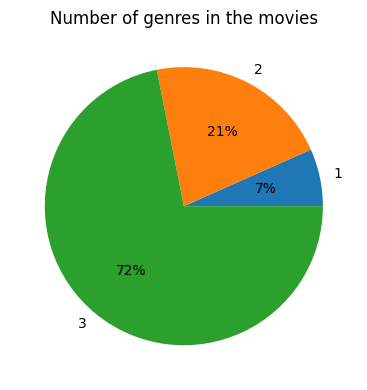

In [11]:
# The distribution of the number of genres per movie

n_genre = []
for i in range(len(ohe_genres)):
    n_genre.append(ohe_genres.iloc[i].sum())

plt.figure(figsize=[10,4])
plt.title('Number of genres in the movies')
plt.pie(pd.get_dummies(pd.Series(n_genre),dtype=int).sum(), labels=[1,2,3],  autopct='%1.0f%%')
plt.tight_layout()
plt.show()

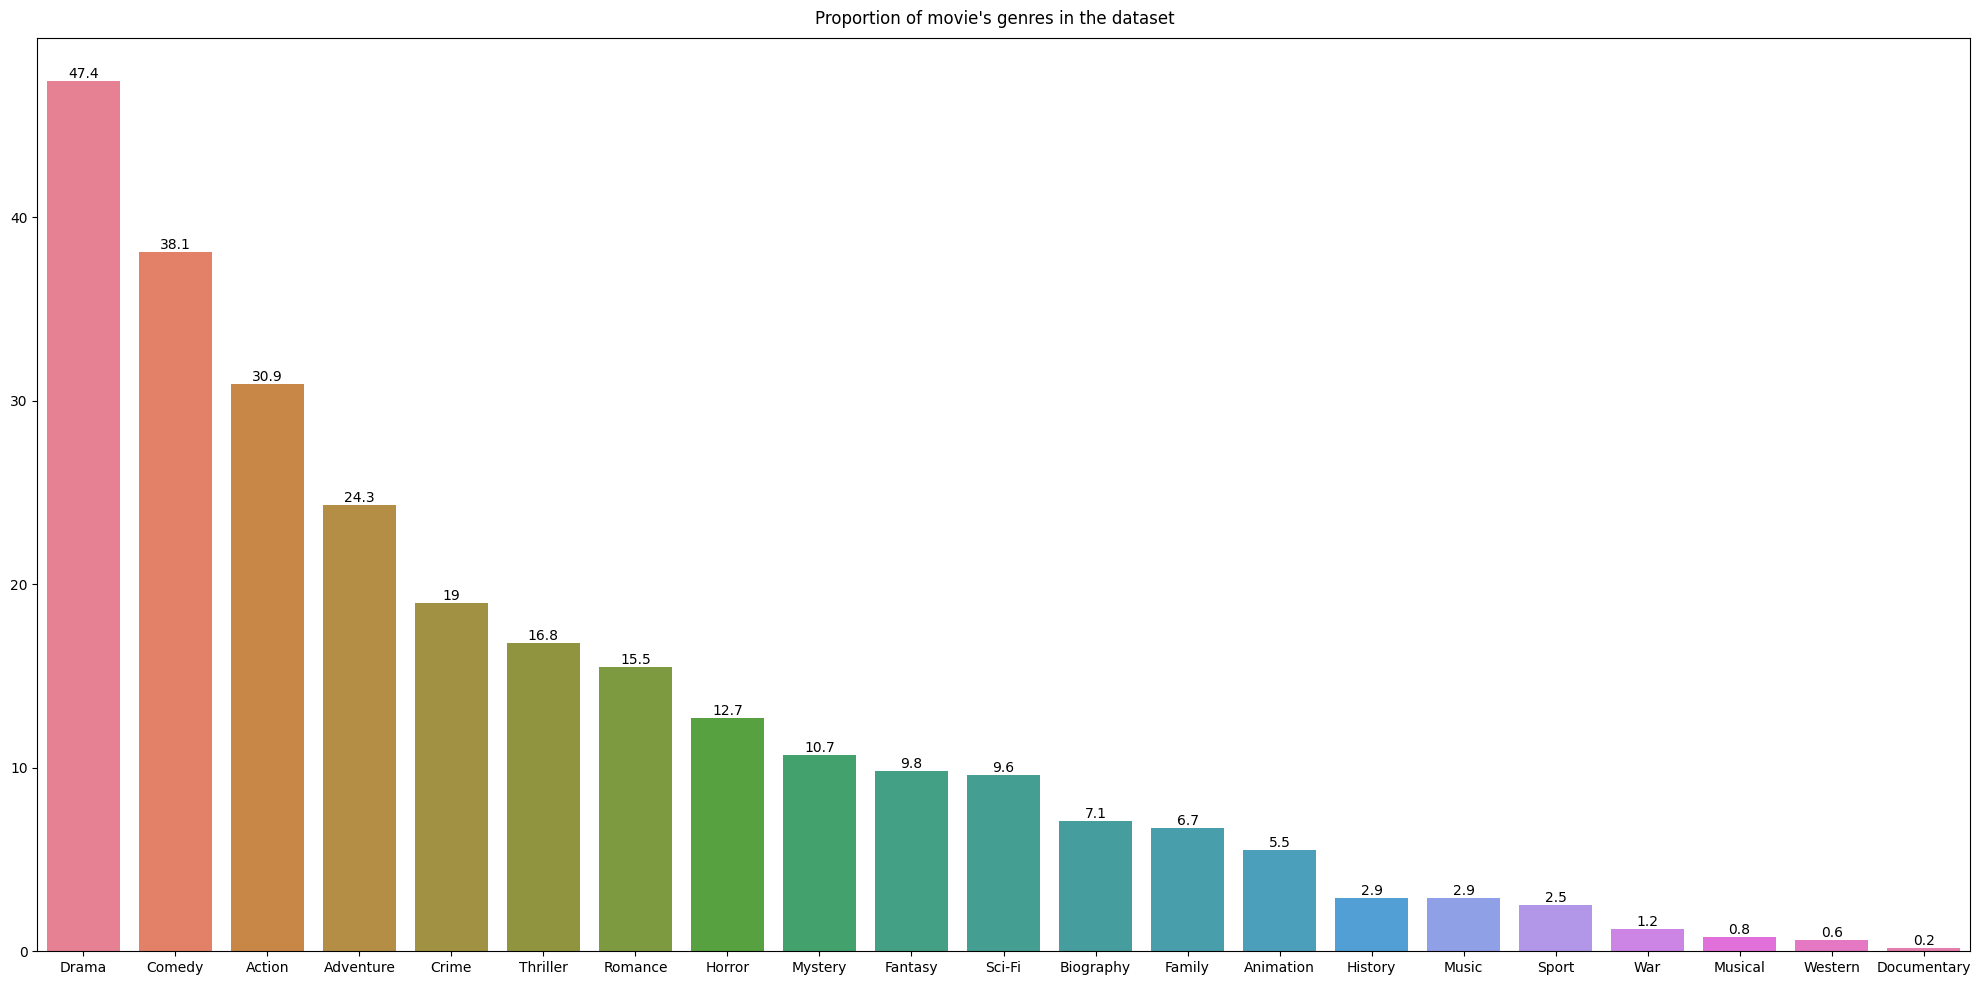

In [12]:
prop_genre = []
for genre in ohe_genres.columns : prop_genre.append(round(ohe_genres[genre].sum()/len(df),3))

plt.figure(figsize=[20,10])
plt.suptitle("Proportion of movie's genres in the dataset")
ax = sns.barplot(pd.DataFrame(np.array(prop_genre)*100,index=ohe_genres.columns,columns=['Count']).sort_values(by='Count',ascending=False).T)
for j in range(len(ax.containers)): ax.bar_label(ax.containers[j])
plt.tight_layout()
plt.show()

In [13]:
df = df.drop(df.columns[[5,7,8]],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Runtime                           4321 non-null   int32  
 1   Release Year                      4321 non-null   int32  
 2   Rating                            4321 non-null   float64
 3   Number of Ratings                 4321 non-null   float64
 4   Budget                            4321 non-null   float64
 5   Gross worldwide                   4321 non-null   float64
 6   US/Canada Gross Proportion        4321 non-null   float64
 7   US/Canada Opening Weekend Impact  4321 non-null   float64
dtypes: float64(6), int32(2)
memory usage: 236.4 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,4321.0,110.411247,18.939464,63.000000,97.000000,107.000000,120.000000,271.000000
Release Year,4321.0,2004.535061,11.035202,1972.000000,1996.000000,2006.000000,2014.000000,2023.000000
Rating,4321.0,6.515598,0.934237,1.900000,6.000000,6.600000,7.200000,9.300000
Number of Ratings,4321.0,0.166710,0.232897,0.000891,0.042000,0.090000,0.194000,2.800000
Budget,4321.0,43.462024,47.276006,0.007000,13.000000,27.000000,56.000000,356.000000
Gross worldwide,4321.0,135.130094,215.678694,0.002554,21.413105,59.468275,157.387195,2923.706026
US/Canada Gross Proportion,4321.0,0.613298,0.277934,0.000115,0.398448,0.564203,0.925237,1.000000
US/Canada Opening Weekend Impact,4321.0,0.262058,0.152007,0.000175,0.151325,0.282285,0.370943,1.000000


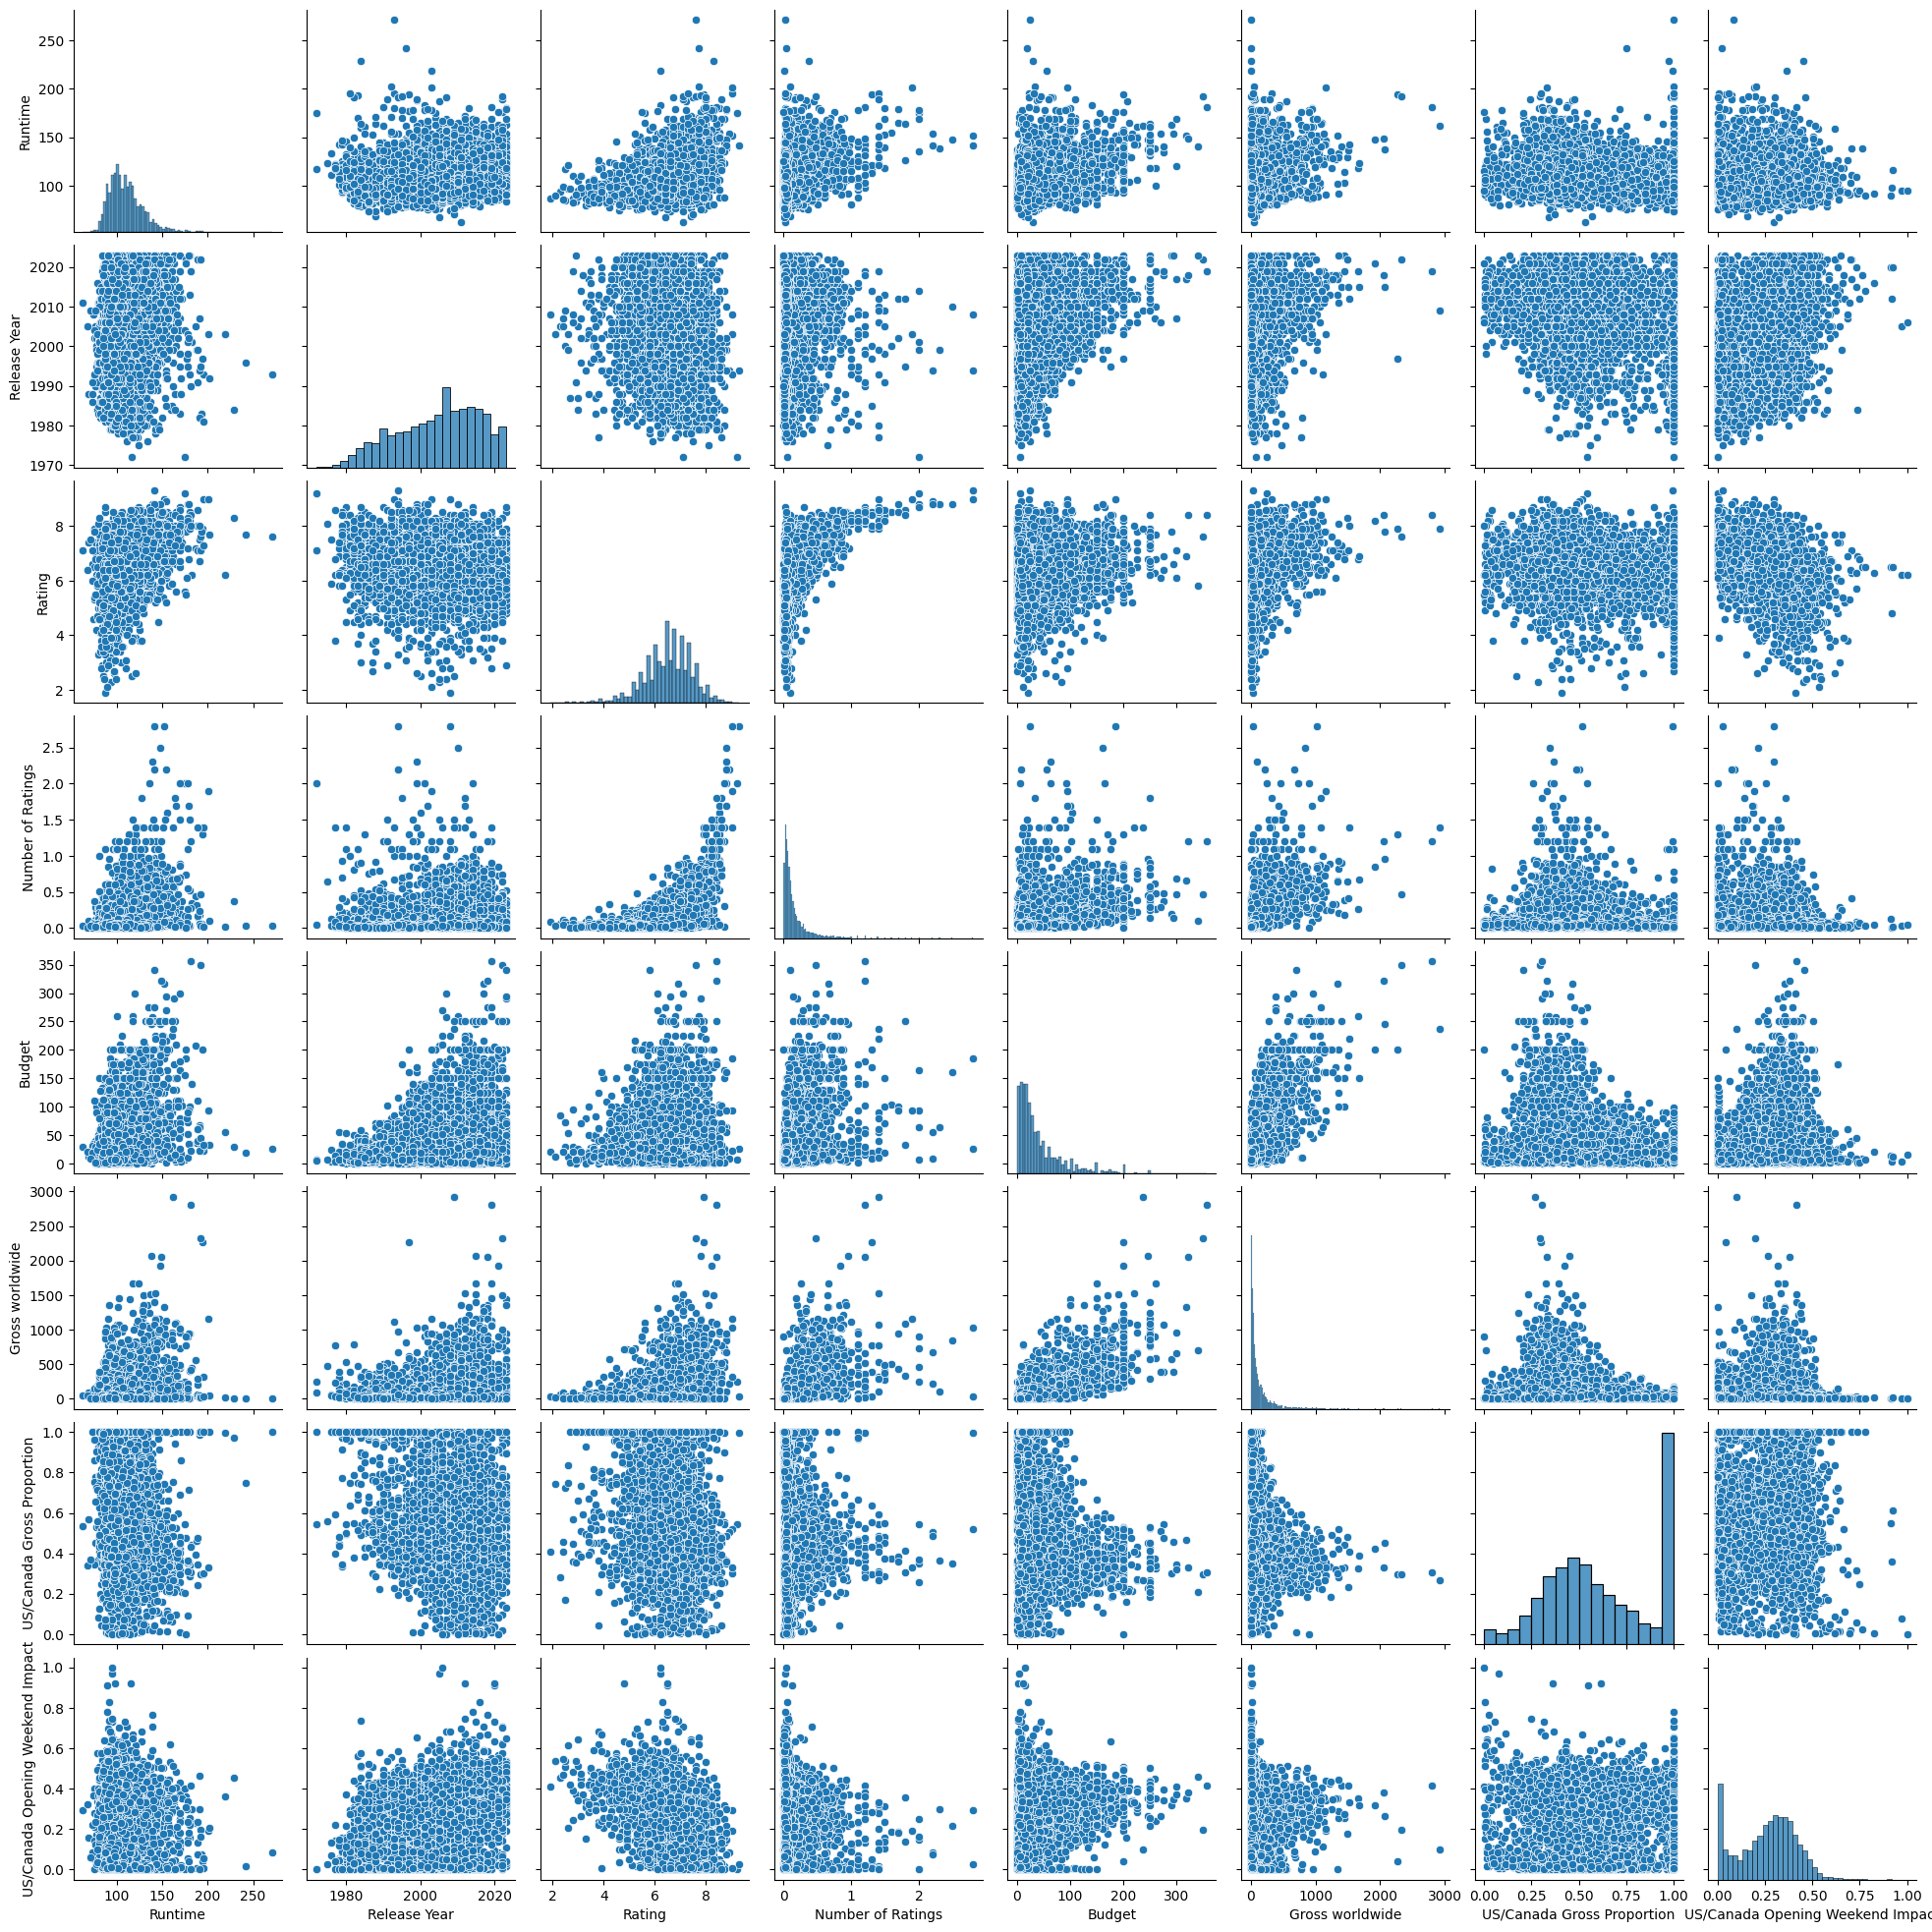

In [15]:
sns.pairplot(df)

Runtime                                                 Rating
Release Year                        US/Canada Gross Proportion
Rating                                       Number of Ratings
Number of Ratings                              Gross worldwide
Budget                                         Gross worldwide
Gross worldwide                                         Budget
US/Canada Gross Proportion                        Release Year
US/Canada Opening Weekend Impact                        Rating
dtype: object


<Axes: >

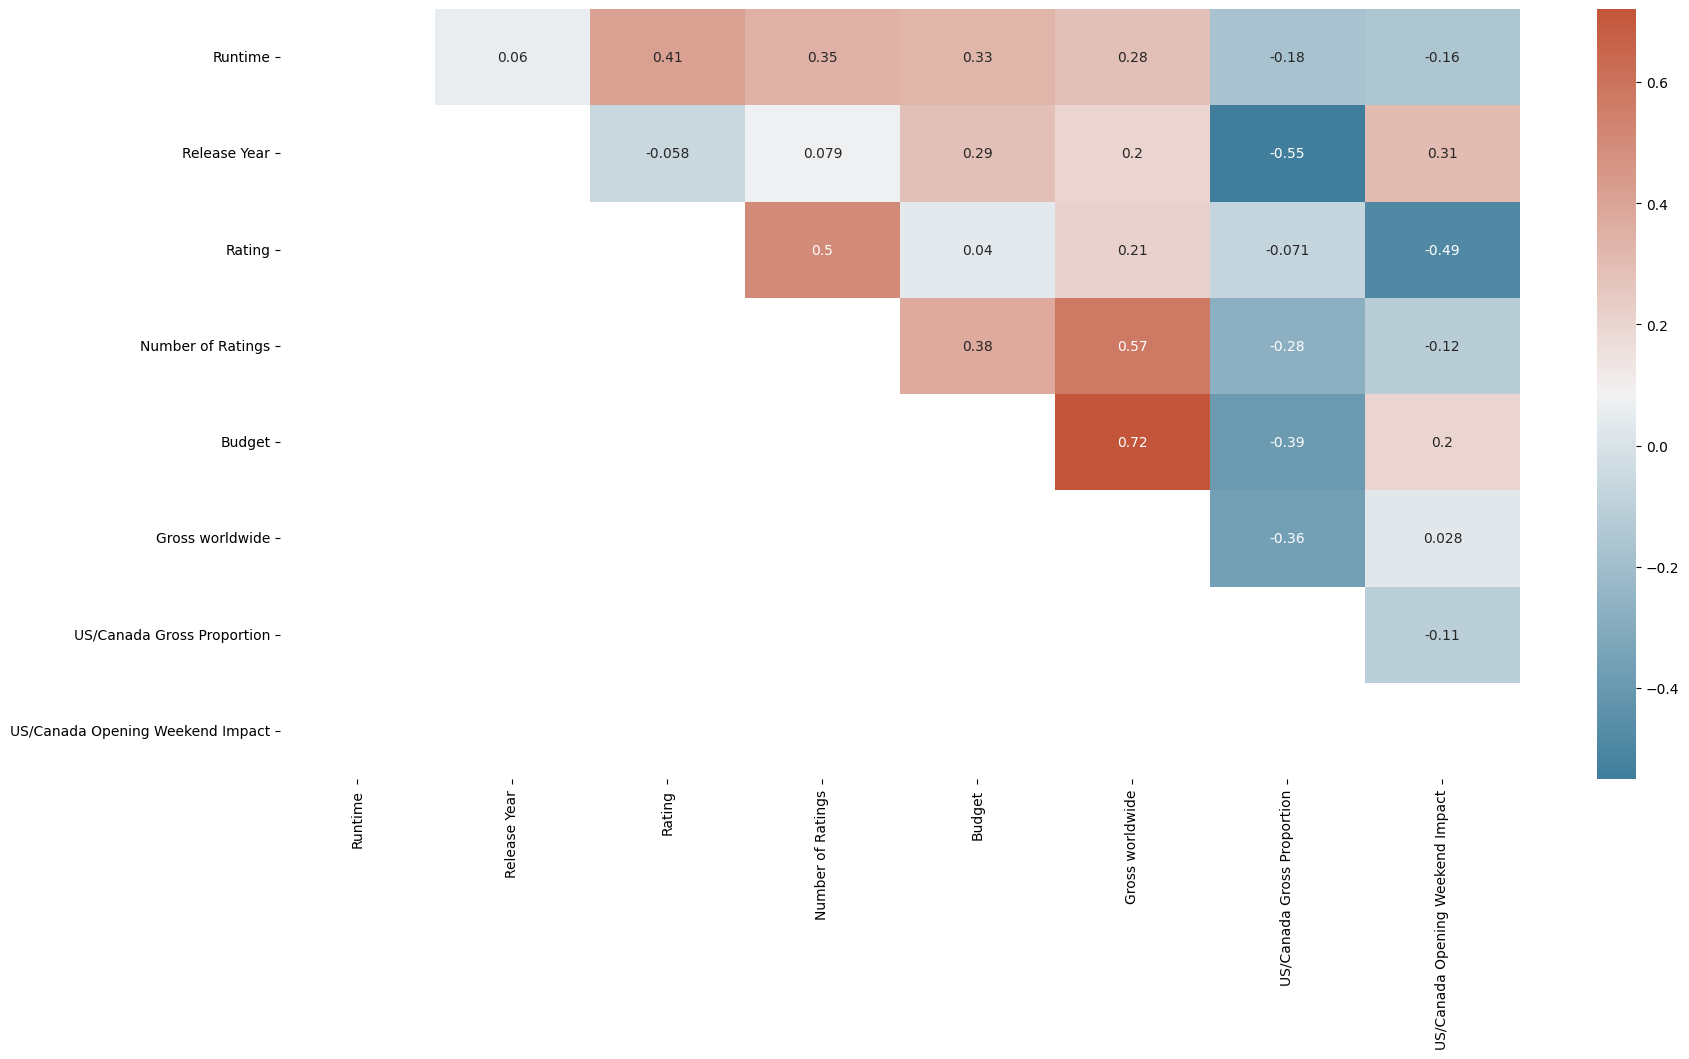

In [16]:
corr_mat = df.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]) : corr_mat.iloc[x,x] = 0.0

# idmax returns the index of the maximum value in each column
print(corr_mat.abs().idxmax())

f, ax = plt.subplots(figsize=(20, 10)) # Set up the matplotlib plot configuration

mask = np.tril(np.ones_like(corr_mat, dtype=bool)) # Generate a mask for upper traingle

cmap = sns.diverging_palette(230, 20, as_cmap=True) # Configure a custom diverging colormap

sns.heatmap(corr_mat, annot=True, mask = mask, cmap=cmap) # Draw the heatmap

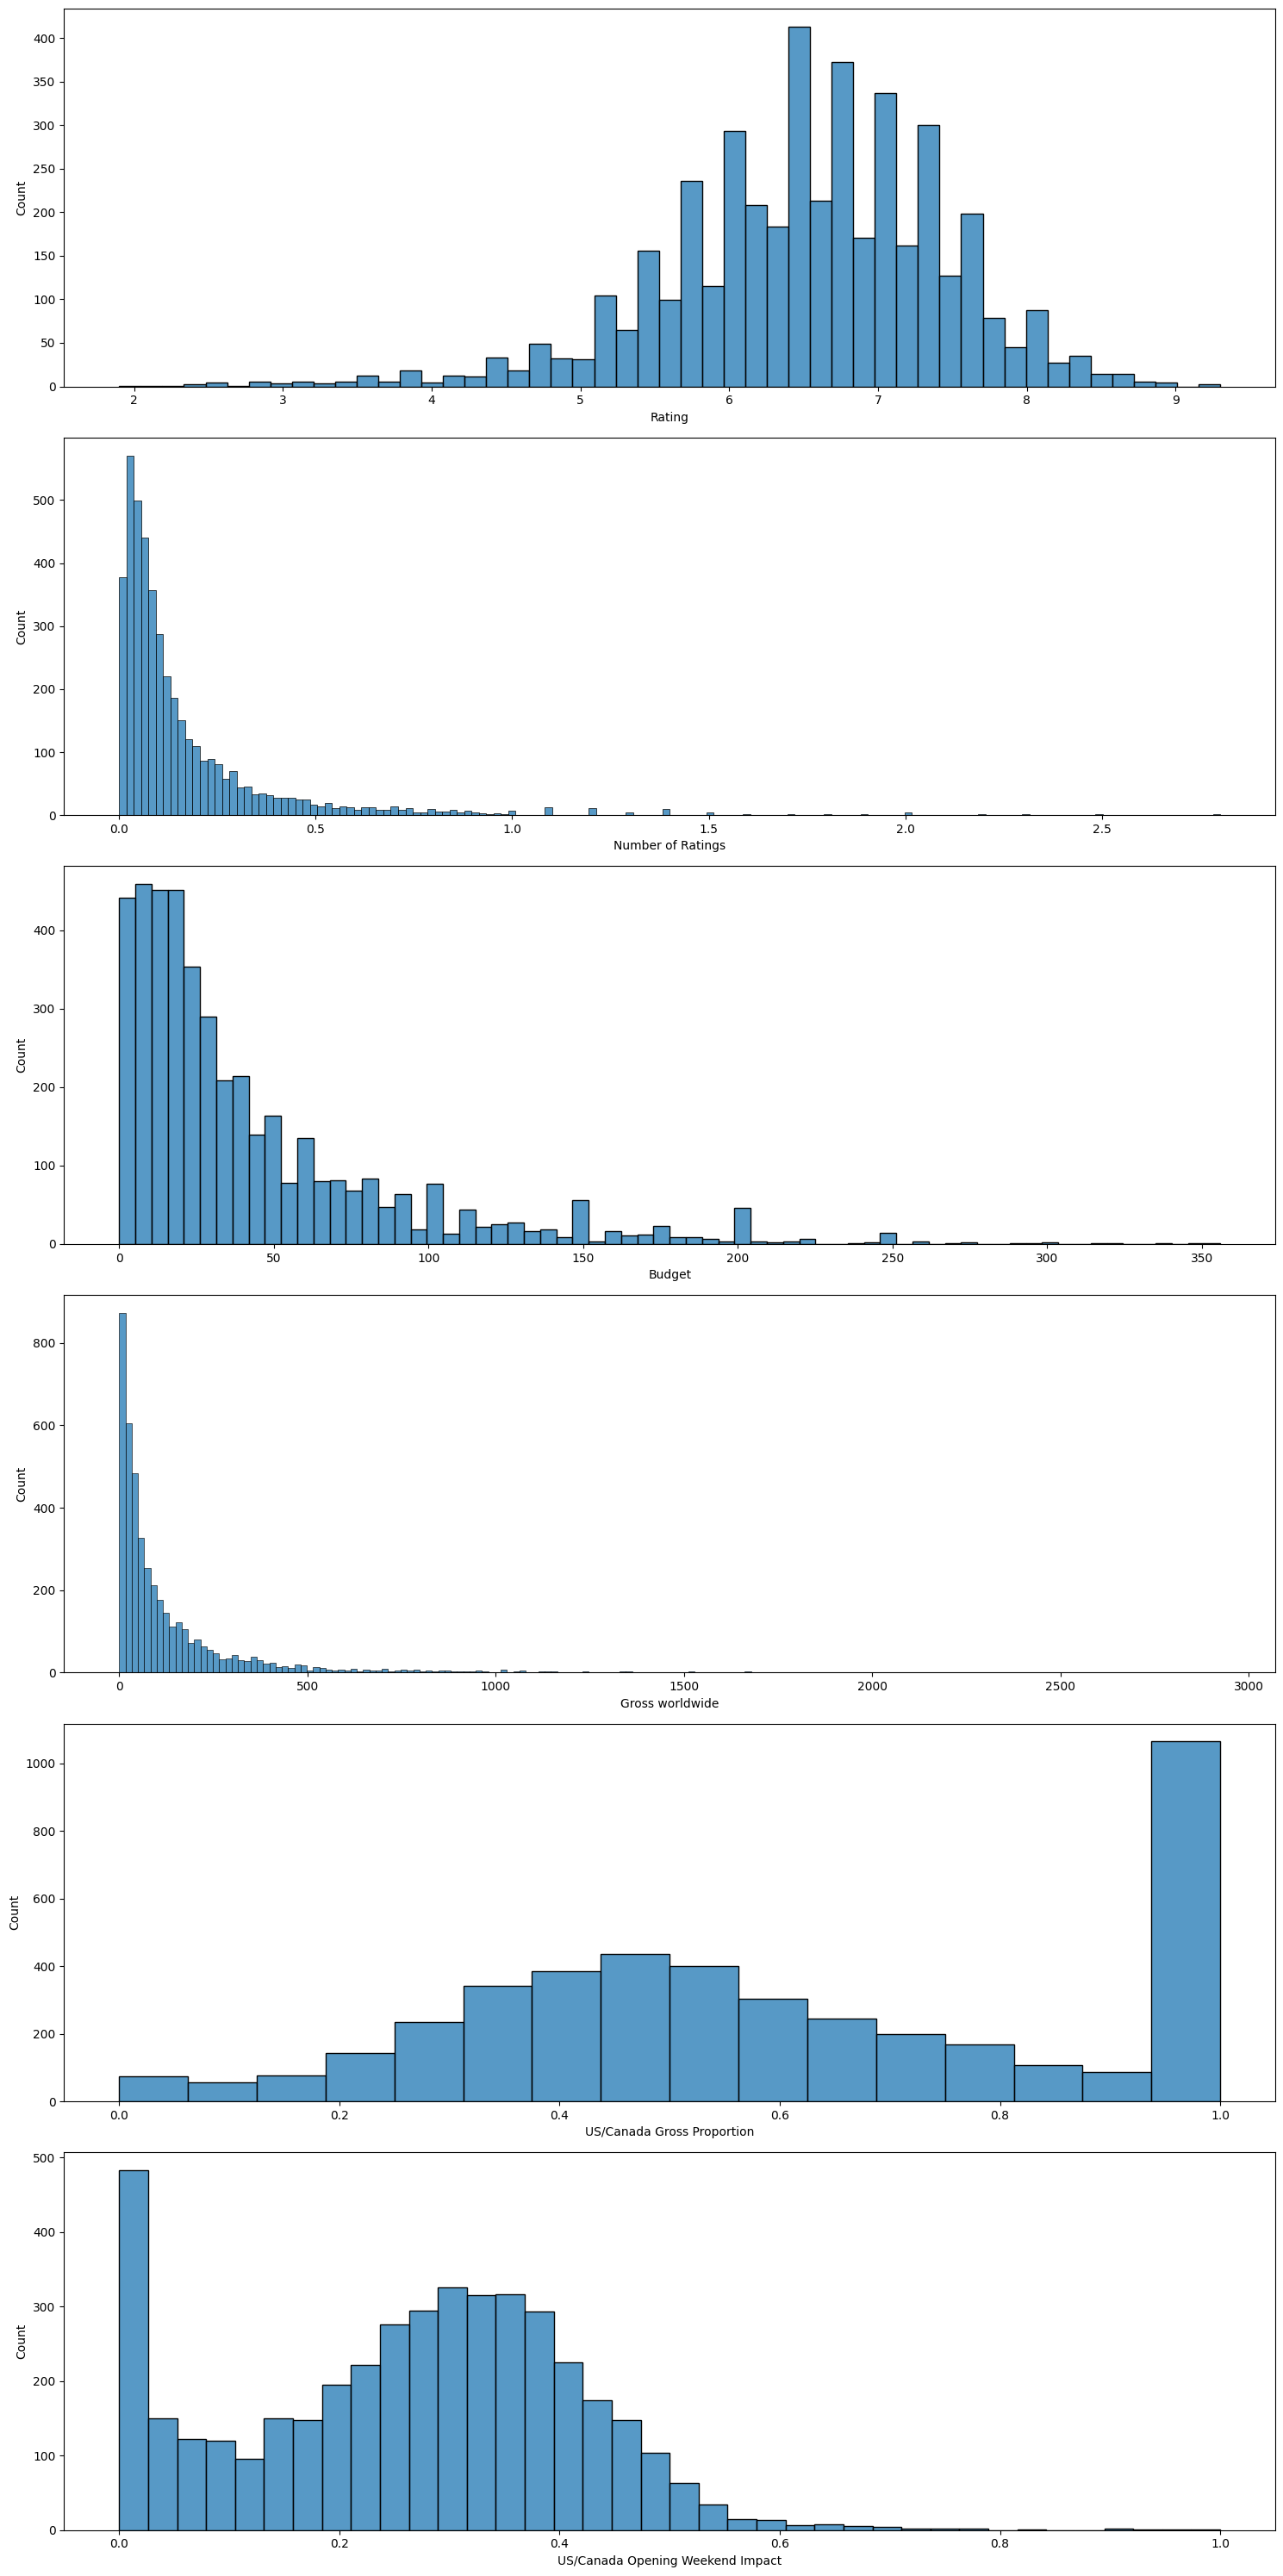

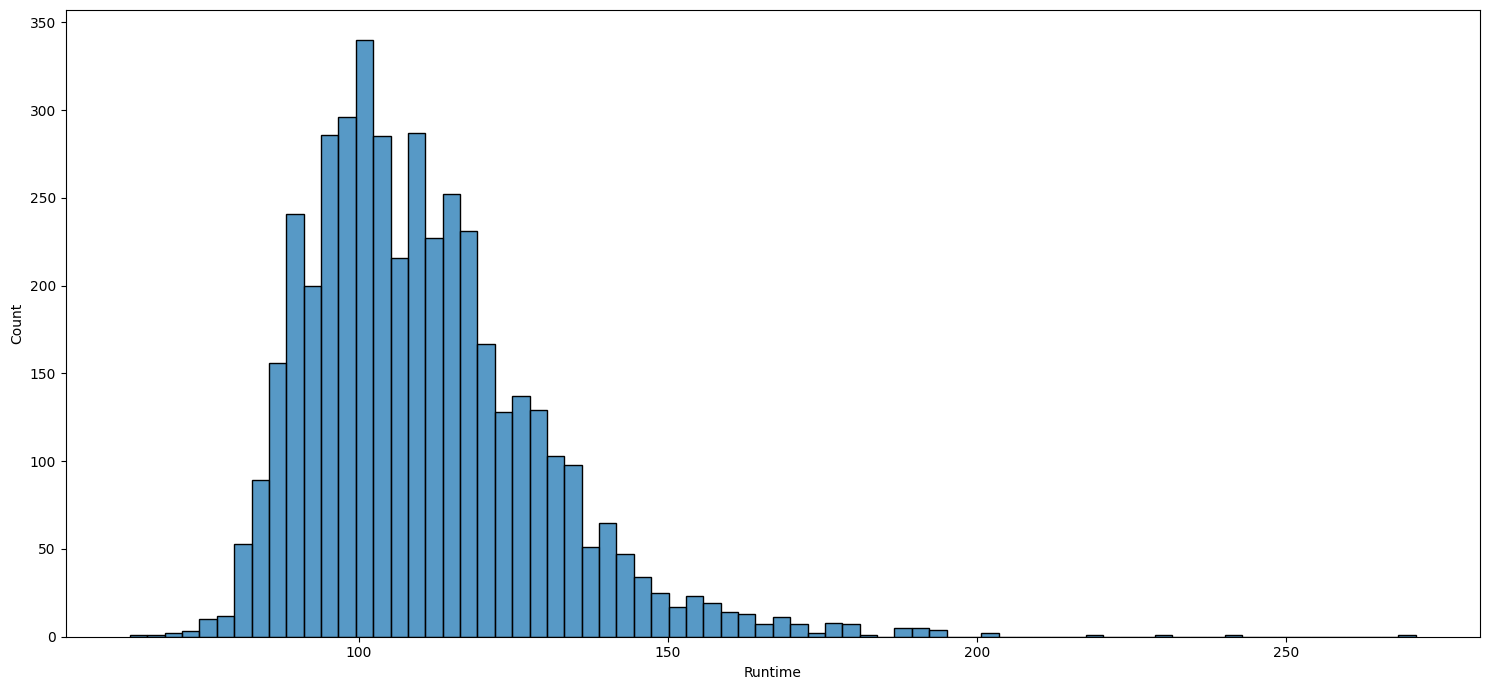

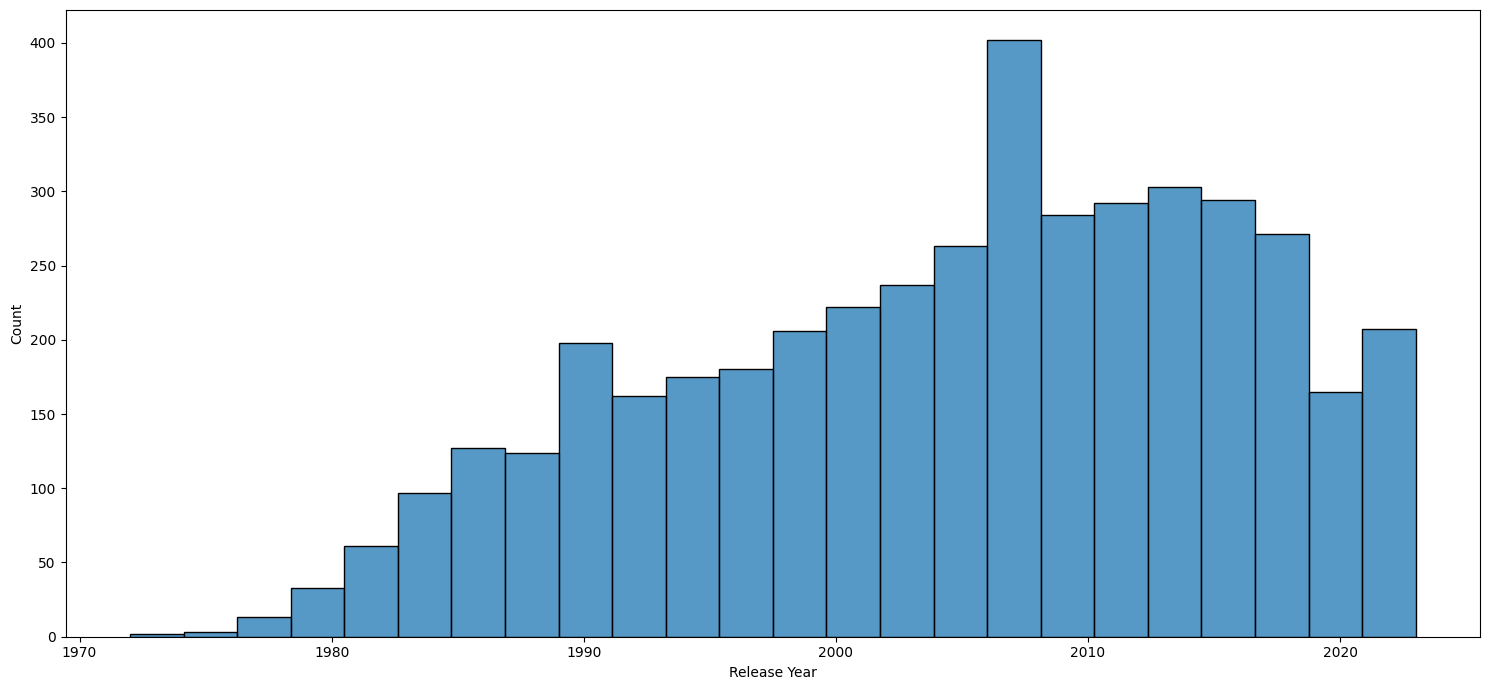

In [17]:
float_cols = df.columns[df.dtypes == float]

plt.figure(figsize=[15,30])
n = len(float_cols)
for i in range(n):
    plt.subplot(n,1,i+1)
    sns.histplot(df,x=float_cols[i])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,7])
sns.histplot(df,x='Runtime')
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,7])
sns.histplot(df,x='Release Year')
plt.tight_layout()
plt.show()

In [18]:
skewed_cols = ['Runtime','Number of Ratings','Budget','Gross worldwide']
df.skew()

Runtime                             1.290685
Release Year                       -0.392086
Rating                             -0.657657
Number of Ratings                   4.078035
Budget                              2.162261
Gross worldwide                     4.210084
US/Canada Gross Proportion          0.057817
US/Canada Opening Weekend Impact   -0.020749
dtype: float64

In [19]:
# Analyzing 'Release Year' and 'Rating' skewness after applying logarithmic functions

reg_cols = ['Release Year','Rating','US/Canada Gross Proportion','US/Canada Opening Weekend Impact']
df_log = pd.DataFrame(df.loc[:,reg_cols].apply(np.log))
df_log1p = pd.DataFrame(df.loc[:,reg_cols].apply(np.log1p))

pd.DataFrame({'Default': df.loc[:,reg_cols].skew(), 'LOG': df_log.skew(), 'LOG-1P': df_log1p.skew()}, index=reg_cols).T

,Release Year,Rating,US/Canada Gross Proportion,US/Canada Opening Weekend Impact
Default,-0.392086,-0.657657,0.057817,-0.020749
LOG,-0.401151,-1.607469,-3.183687,-1.946760
LOG-1P,-0.401146,-1.408377,-0.220241,-0.294146


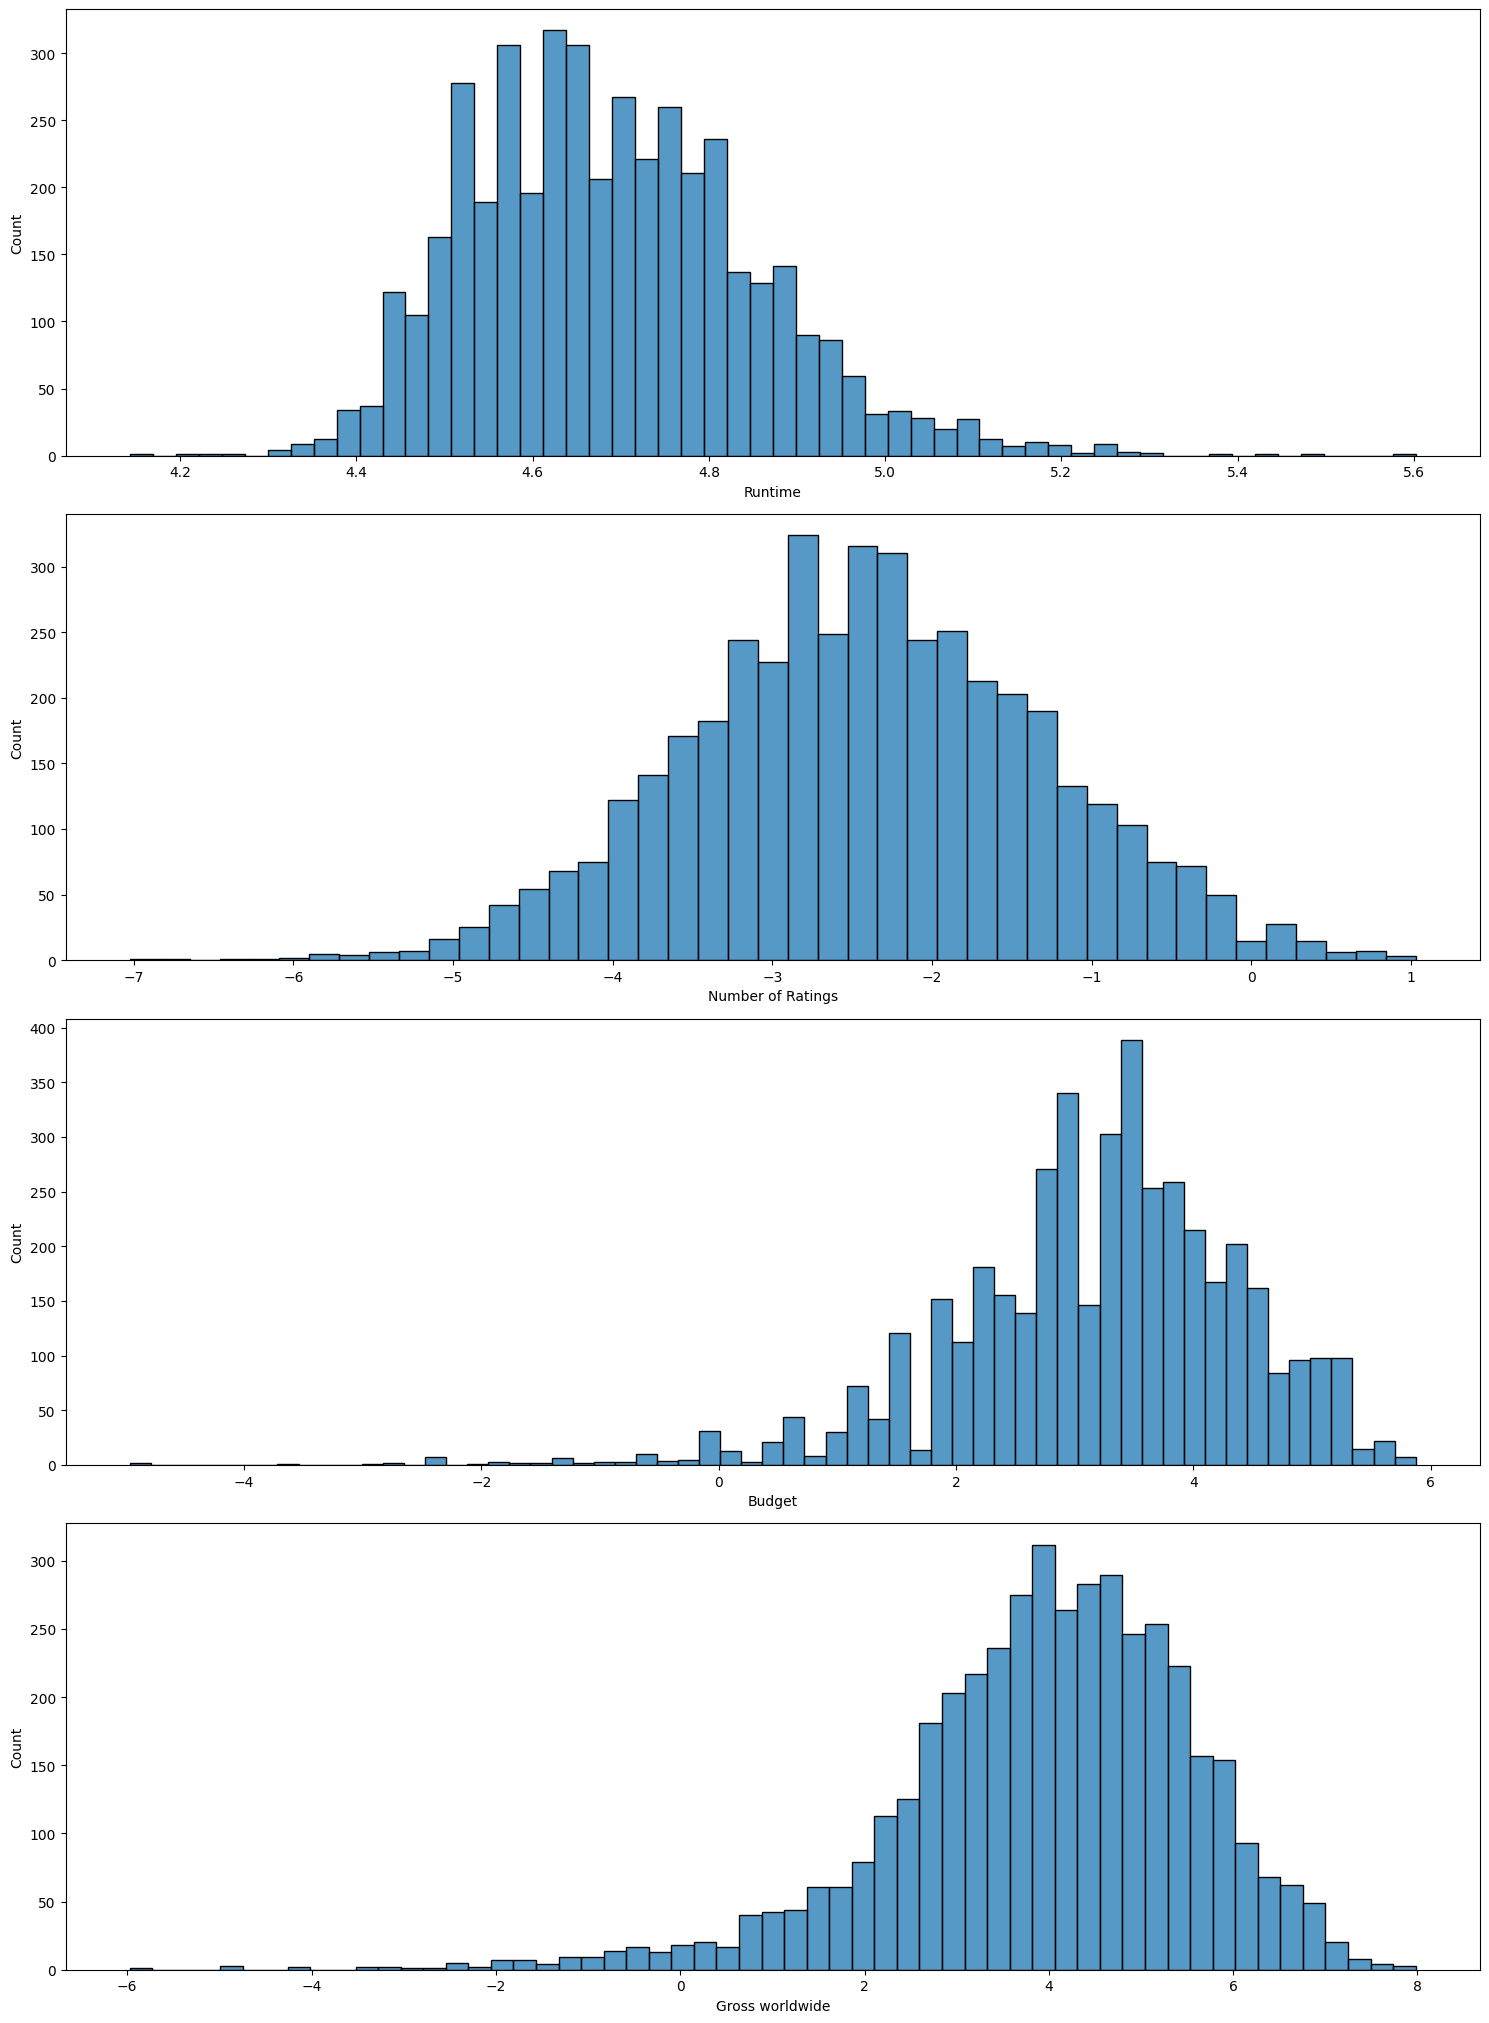

In [20]:
# Transforming data with log transformation (log numpy function)

log_float = df.loc[:,skewed_cols].apply(np.log)
i = 1

plt.figure(figsize=[15,30])
for col in log_float.columns:
    plt.subplot(6,1,i)
    sns.histplot(log_float,x=col)
    i += 1
plt.tight_layout()
plt.show()

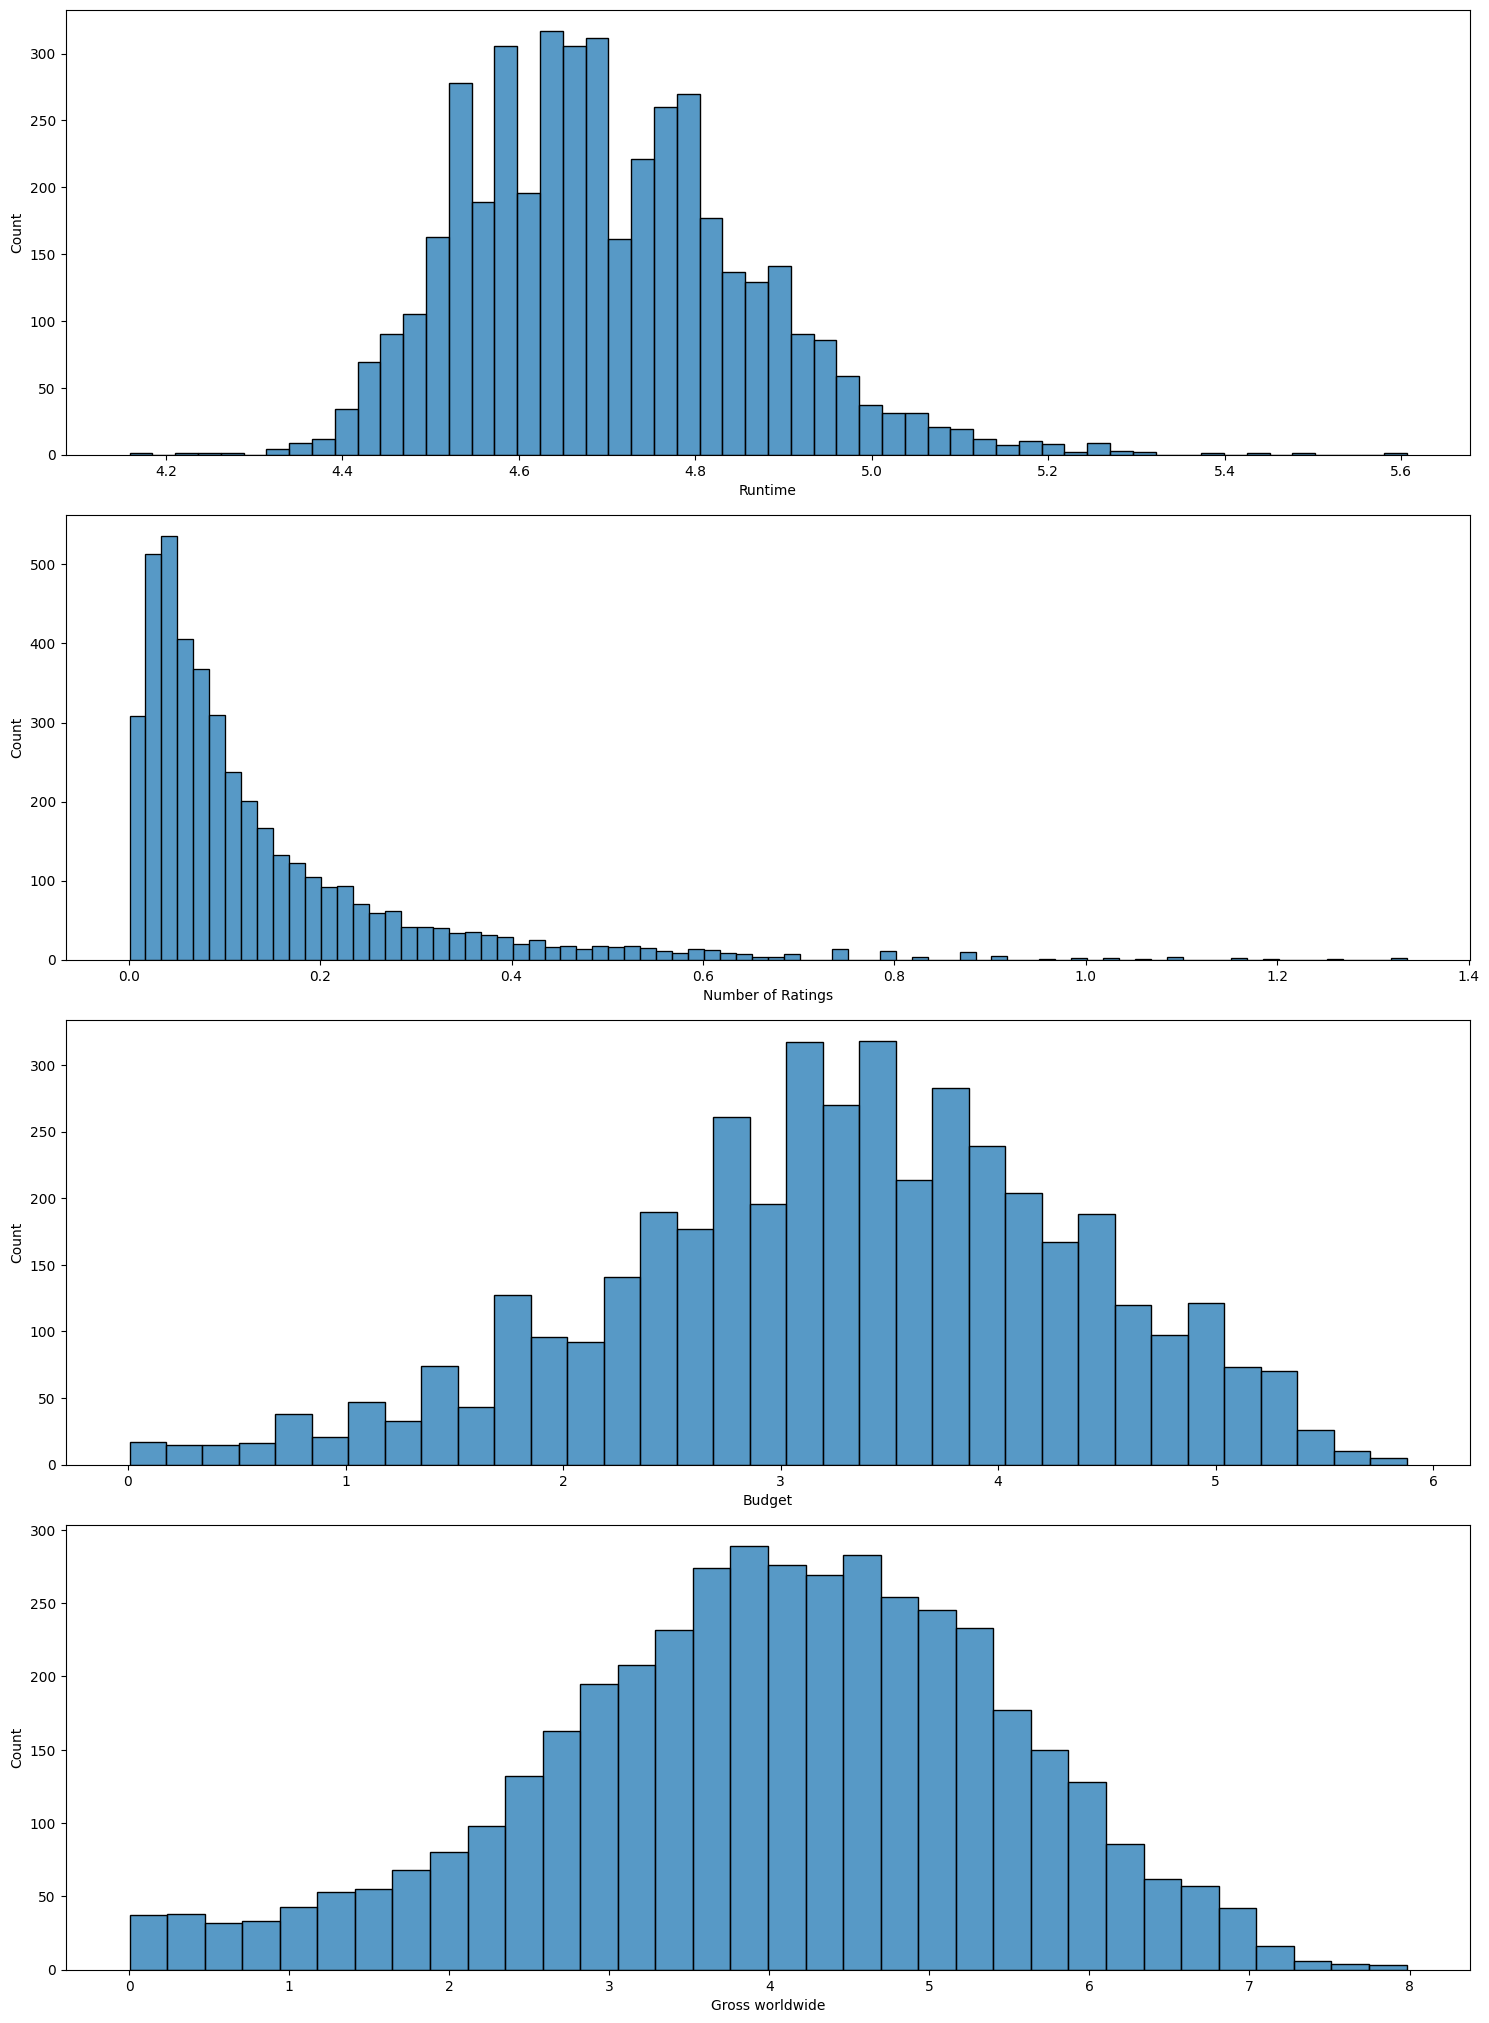

In [21]:
# Transforming data with log1p numpy function

log1p_float = df.loc[:,skewed_cols].apply(np.log1p)
i = 1

plt.figure(figsize=[15,30])
for col in log1p_float.columns:
    plt.subplot(6,1,i)
    sns.histplot(log1p_float,x=col)
    i += 1
plt.tight_layout()
plt.show()

In [22]:
print('Skewness comparison after applying logarithmic functions')
pd.DataFrame({'DEFAULT': df.loc[:,skewed_cols].skew(),'LOG': log_float.skew(), 'LOG-1P': log1p_float.skew()}).T

Skewness comparison after applying logarithmic functions


,Runtime,Number of Ratings,Budget,Gross worldwide
DEFAULT,1.290685,4.078035,2.162261,4.210084
LOG,0.604399,-0.026922,-0.966395,-0.945401
LOG-1P,0.609150,2.608702,-0.335437,-0.348246


In [23]:
# CLUSTERING ALGORITHMS

In [24]:
# Custom functions used in the analysis

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def clusters_visualization(df):
    X_embedded = TSNE(n_components=2,random_state=321).fit_transform(df.iloc[:,:-1])
    X_embedded = pd.DataFrame(X_embedded,columns=['x','y'])
    X_embedded['cluster'] = df.iloc[:,-1]
    sns.scatterplot(data=X_embedded,x='x',y='y',hue='cluster',palette='Set2')

def clusters_porportion(df,model):
    plt.figure(figsize=[10,4])
    plt.title(f'Clusters proportion - {model}')
    plt.pie(df['cluster'].value_counts(), labels=df['cluster'].value_counts().index,  autopct='%1.0f%%')
    plt.tight_layout()
    plt.show()

def log_transformation(log_df):
    # np.log
    log_cols = ['Runtime','Number of Ratings']
    log_df.loc[:,log_cols] = log_df.loc[:,log_cols].apply(np.log)
    # np.log1p
    log1p_cols = ['Budget','Gross worldwide']
    log_df.loc[:,log1p_cols] = log_df.loc[:,log1p_cols].apply(np.log1p)
    return log_df

def top5_by_cluster(df_mean,df_count,feat=True):
    top5_df = pd.DataFrame()
    for cl in list(df_mean.columns.values[:-1]):
        if feat is True: 
            mean = pd.Series(pd.Series(np.abs((df_mean[cl] - df_mean['Dataset'])).sort_values(ascending=False).head(5)).index,name='Mean_'+str(cl),index=range(1,6))
            proportion = pd.Series(np.abs(np.abs(df_count[cl] - df_count['Dataset']) / df_count['Dataset']).sort_values(ascending=False).head(5).index,name='Prop_'+str(cl),index=range(1,6))            
            top5_df = pd.concat([top5_df,mean,proportion],axis=1)
        else: 
            mean = pd.Series(np.abs(df_mean[cl] - df_mean['Dataset']).sort_values(ascending=False).head(5).values,name='Mean_'+str(cl),index=range(1,6))
            proportion = pd.Series(np.abs(np.abs(df_count[cl] - df_count['Dataset']) / df_count['Dataset']).sort_values(ascending=False).head(5).values,name='Prop_'+str(cl),index=range(1,6))
            top5_df = pd.concat([top5_df,mean,proportion],axis=1)
    return top5_df

def n_comp(df):
    threshold = 0.99
    pca = PCA()
    pca.fit(df)
    components = np.cumsum(pca.explained_variance_ratio_) < threshold
    return components.sum() + 1

def plot_graphs(title,m,inertia,distortion,log_inertia=None,log_distortion=None):
    if (log_inertia is None) and (log_distortion is None):
        plt.figure(figsize=(12, 5))
        plt.suptitle(title)
        plt.subplot(1,2,1)
        plt.title('INERTIA')
        sns.lineplot(x=[*range(1,m)],y=inertia)
        plt.subplot(1,2,2)
        plt.title('DISTORTION')
        sns.lineplot(x=[*range(1,m)],y=distortion)
    else:
        plt.figure(figsize=(20, 15))
        plt.suptitle(title)
        plt.subplot(2,2,1)
        plt.title('INERTIA')
        sns.lineplot(x=[*range(1,m)],y=inertia)
        plt.subplot(2,2,2)
        plt.title('DISTORTION')
        sns.lineplot(x=[*range(1,m)],y=distortion)
        plt.subplot(2,2,3)
        plt.title('INERTIA - WITH LOG')
        sns.lineplot(x=[*range(1,m)],y=log_inertia)
        plt.subplot(2,2,4)
        plt.title('DISTORTION - WITH LOG')
        sns.lineplot(x=[*range(1,m)],y=log_distortion)
    plt.tight_layout()
    plt.show()

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans()

distortion = []; inertia = []; m = 31 #m = 301
for n in range(1,m):
    cluster_df = df.copy()
    #cluster_df = df.drop('Budget',axis=1)
    kmeans = KMeans(n_clusters=n,init='k-means++',n_init=1,random_state=321)
    kmeans.fit_predict(cluster_df)
    inertia.append(kmeans.inertia_)
    distortion.append(kmeans.inertia_/n)

#plot_graphs('DEFAULT',m,inertia,distortion)

print('DEFAULT')
pd.DataFrame([inertia,distortion],index=['INERTIA','DISTORTION'],columns=[*range(1,m)]).T.head()

C:\Users\Lucke\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Lucke\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


DEFAULT


,INERTIA,DISTORTION
1,2.126901e+08,2.126901e+08
2,8.314847e+07,4.157424e+07
3,4.668221e+07,1.556074e+07
4,3.277972e+07,8.194931e+06
5,2.239688e+07,4.479376e+06


In [26]:
# Scaling with StandardScaler and testing its clusters

from sklearn.preprocessing import StandardScaler

#cluster_df = df.drop('Budget',axis=1)
cluster_df = df.copy()
log_df = log_transformation(cluster_df.copy()) # Log Transformations
onlylog_df = log_df.copy()

# StandardScaler
cluster_df.loc[:] = StandardScaler().fit_transform(cluster_df)
log_df.loc[:] = StandardScaler().fit_transform(log_df)

distortion = []; log_distortion = []; log_inertia = []; inertia = []; only_log_distortion = [];m = 31 #m = 301
for n in range(1,m):
    kmeans = KMeans(n_clusters=n,init='k-means++',n_init=1,random_state=321)
    log_kmeans = KMeans(n_clusters=n,init='k-means++',n_init=1,random_state=321)
    onlylog_kmeans = KMeans(n_clusters=n,init='k-means++',n_init=1,random_state=321)
    kmeans.fit(cluster_df); log_kmeans.fit(log_df); onlylog_kmeans.fit(onlylog_df)
    inertia.append(kmeans.inertia_)
    distortion.append(kmeans.inertia_/n)
    log_inertia.append(log_kmeans.inertia_)
    log_distortion.append(log_kmeans.inertia_/n)
    only_log_distortion.append(onlylog_kmeans.inertia_/n)

#plot_graphs('STANDARD SCALER',m,inertia,distortion,log_inertia,log_distortion)
#pd.DataFrame([inertia,log_inertia,distortion,log_distortion],index=['INERTIA','INERTIA - WITH LOG','DISTORTION','DISTORTION - WITH LOG'],columns=[*range(5,m,5)]).T.head()

print('COMPARING LOG WITH STANDARD SCALER')
pd.DataFrame([only_log_distortion,distortion,log_distortion],index=['DISTORTION - LOG','DISTORTION - STD SCL','DISTORTION - LOG & STD SCL'],columns=[*range(1,m)]).T.head()

COMPARING LOG WITH STANDARD SCALER


,DISTORTION - LOG,DISTORTION - STD SCL,DISTORTION - LOG & STD SCL
1,549957.392937,34568.000000,34568.000000
2,86961.063951,13604.680206,12977.370999
3,30962.347046,7461.861545,7318.760485
4,16065.929449,4759.904002,4943.332257
5,10151.967374,3512.456734,3628.703899


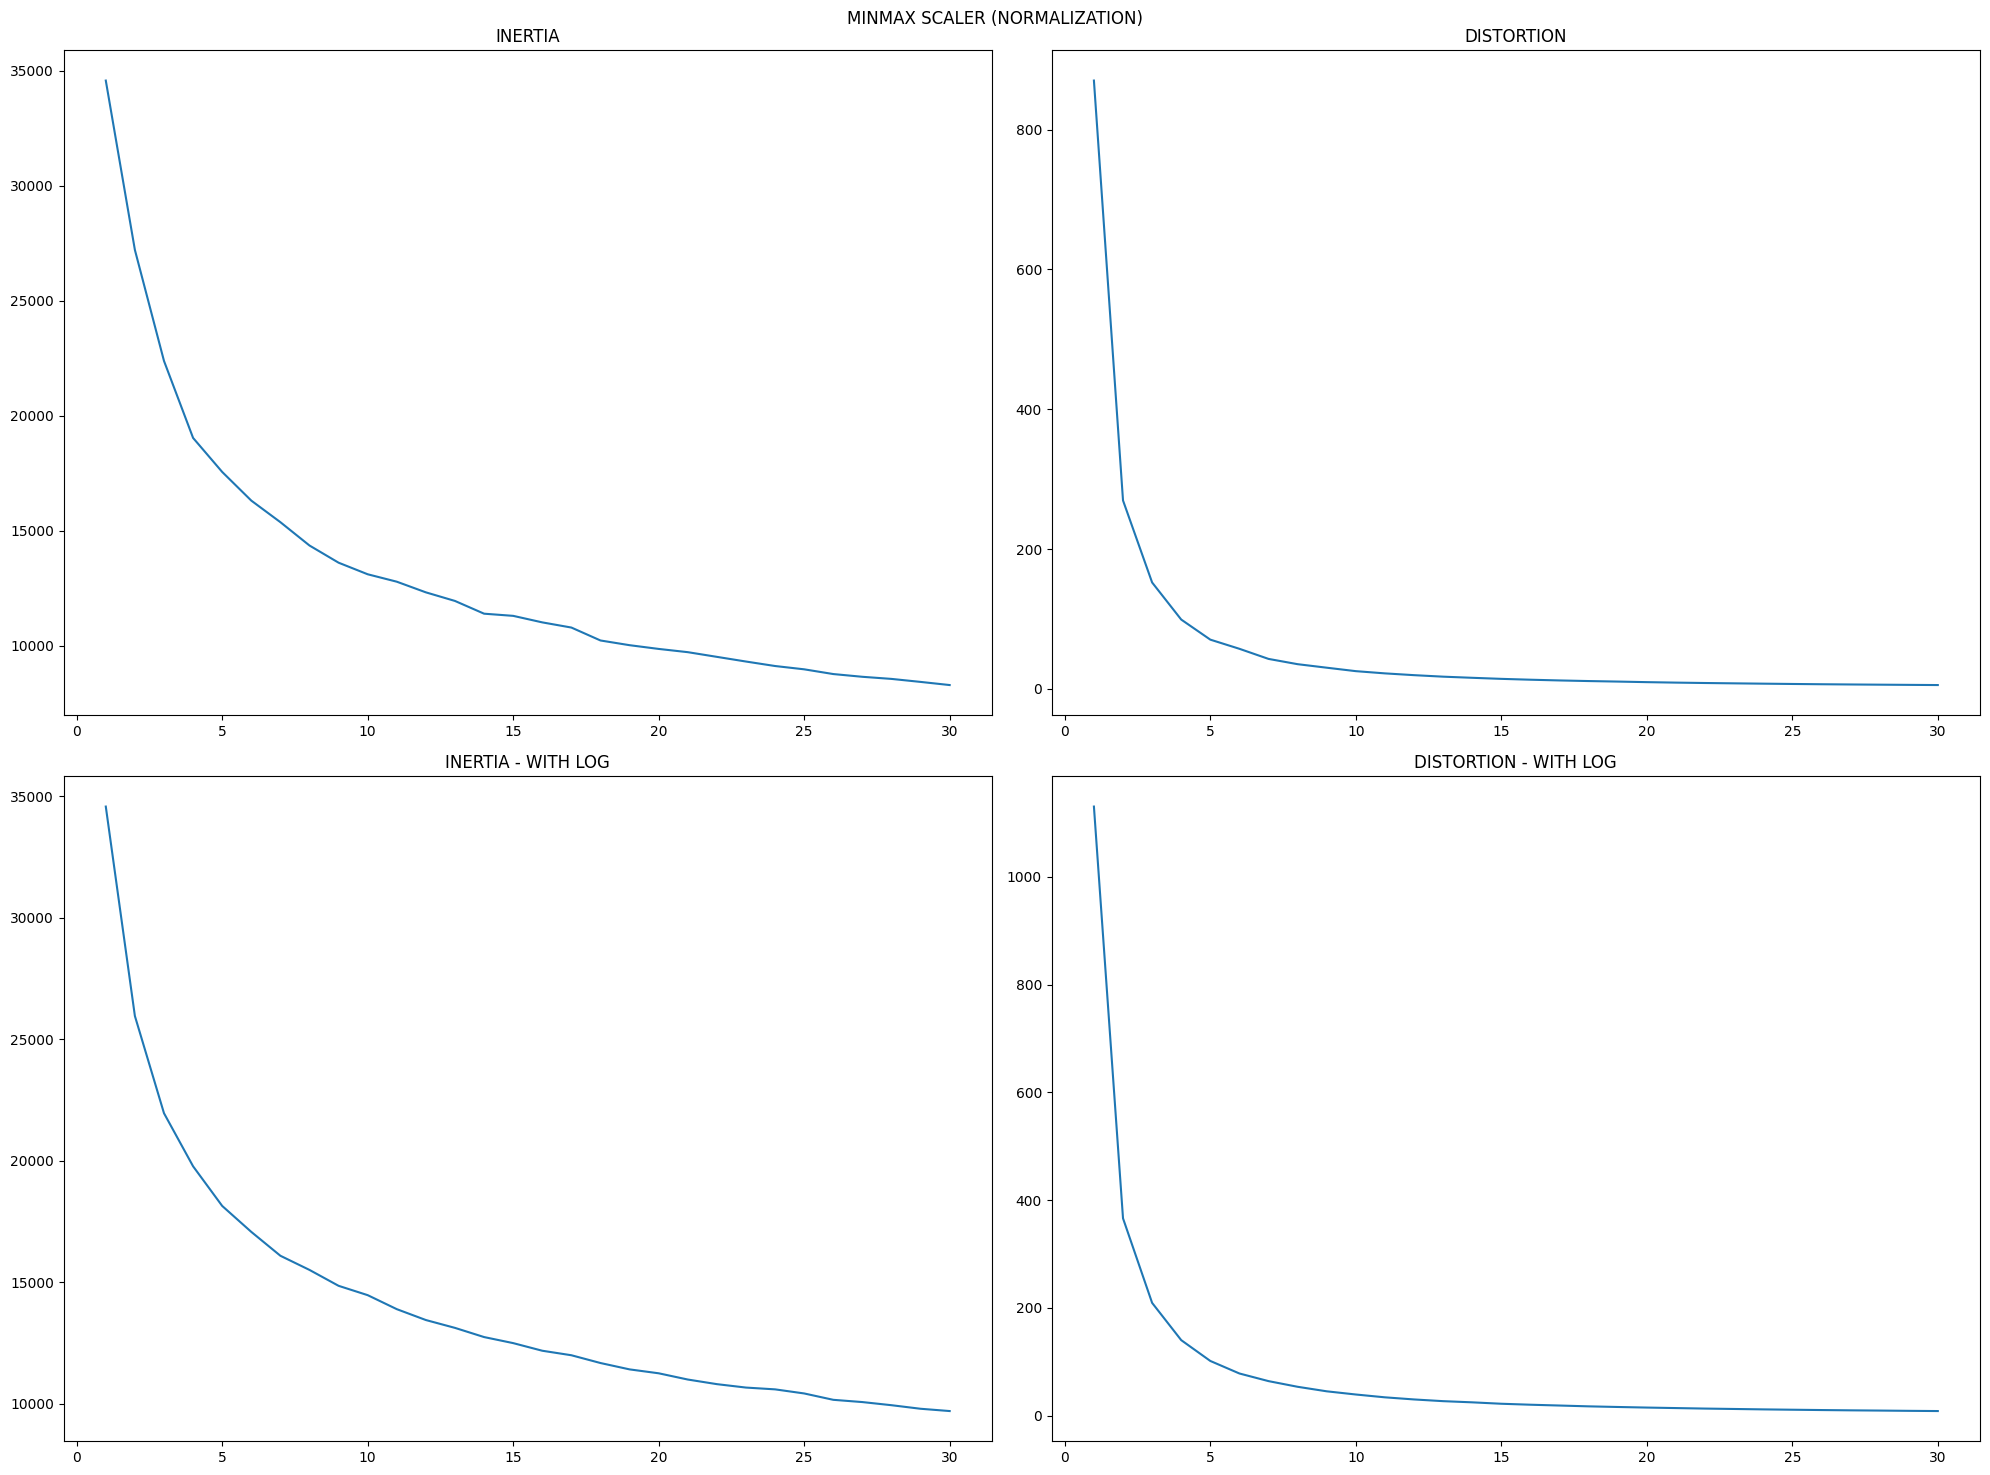

MINMAX SCALER (NORMALIZATION)


,DISTORTION - MM SCL,DISTORTION - LOG & MM SCL
1,870.169286,1130.211885
2,269.517634,366.285797
3,152.214107,209.444355
4,99.171663,140.324958
5,70.445019,101.704337


In [27]:
# Scaling with MinMaxScaler and testing its clusters

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

#cluster_df = df.drop('Budget',axis=1)
cluster_df = df.copy()
log_df = log_transformation(cluster_df.copy()) # Log Transformations

# MinMax Scaler (Normalization)
cluster_df.loc[:] = MinMaxScaler().fit_transform(cluster_df)
log_df.loc[:] = MinMaxScaler().fit_transform(log_df)

silhouette_avg = []
distortion = []; log_distortion = []; m = 31 #m = 301
for n in range(1,m):
    kmeans = KMeans(n_clusters=n,init='k-means++',n_init=1,random_state=321)
    log_kmeans = KMeans(n_clusters=n,init='k-means++',n_init=1,random_state=321)
    kmeans.fit(cluster_df); log_kmeans.fit(log_df)
    distortion.append(kmeans.inertia_/n)
    log_distortion.append(log_kmeans.inertia_/n)
    # silhouette score for n_clusters < 6 
    if n > 1 and n < 7 : silhouette_avg.append(silhouette_score(log_df, log_kmeans.predict(log_df))) 

plot_graphs('MINMAX SCALER (NORMALIZATION)',m,inertia,distortion,log_inertia,log_distortion)

print('MINMAX SCALER (NORMALIZATION)')
only_mm_distortion = distortion; log_mm_distortion = log_distortion
pd.DataFrame([distortion,log_distortion],index=['DISTORTION - MM SCL','DISTORTION - LOG & MM SCL'],columns=[*range(1,m)]).T.head()

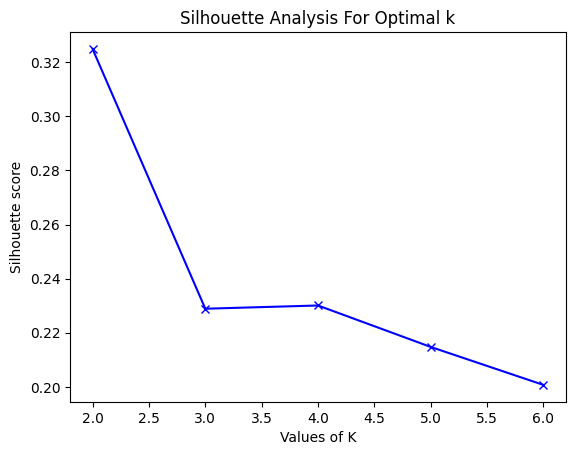

In [28]:
# Visualizing silhouette analysis for optimal k

plt.plot(range(2,7),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis For Optimal k')
plt.show()

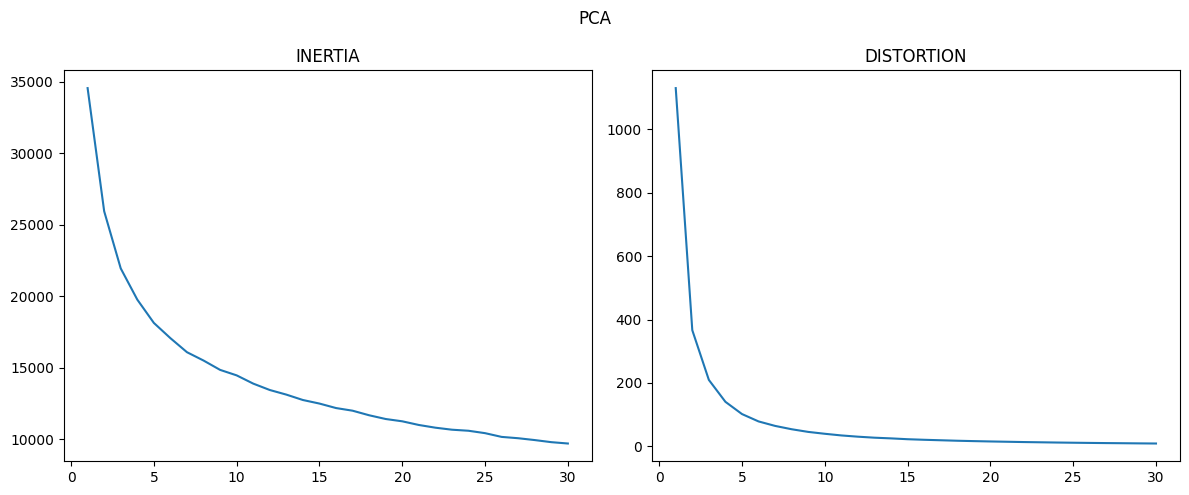

,DISTORTION - MM SCL,DISTORTION - MM SCL WITH PCA,DISTORTION - LOG & MM SCL,DISTORTION - LOG & MM SCL WITH PCA
1,870.169286,863.321088,1130.211885,1130.211885
2,269.517634,266.098247,366.285797,366.285797
3,152.214107,149.940124,209.444355,209.444355
4,99.171663,97.462309,140.324958,140.324958
5,70.445019,69.075904,101.704337,101.704337


In [29]:
# Analyzing clusters generated with dataset without genres columns


#nc_mm = n_comp(cluster_df); nc_log = n_comp(log_df)
# nc_mm = 7; nc_log = 8

pca = PCA(n_components=7); pca_log = PCA(n_components=8)
reduced_mm = pca.fit_transform(cluster_df)
reduced_log = pca_log.fit_transform(log_df)

distortion = []; log_distortion = []; pca_distortion = []; pca_log_distortion = []; m = 31 #m = 301
for n in range(1,m):
    kmeans = KMeans(n_clusters=n,init='k-means++',n_init=1,random_state=321)
    log_kmeans = KMeans(n_clusters=n,init='k-means++',n_init=1,random_state=321)
    pca_kmeans = KMeans(n_clusters=n,init='k-means++',n_init=1,random_state=321)
    pca_log_kmeans = KMeans(n_clusters=n,init='k-means++',n_init=1,random_state=321)
    kmeans.fit(cluster_df); log_kmeans.fit(log_df)
    pca_kmeans.fit(reduced_mm); pca_log_kmeans.fit(reduced_log)
    distortion.append(kmeans.inertia_/n)
    log_distortion.append(log_kmeans.inertia_/n)
    pca_distortion.append(pca_kmeans.inertia_/n)
    pca_log_distortion.append(pca_log_kmeans.inertia_/n)

plot_graphs('PCA',m,log_inertia,log_distortion)

pd.DataFrame([distortion,pca_distortion,log_distortion,pca_log_distortion],index=['DISTORTION - MM SCL','DISTORTION - MM SCL WITH PCA','DISTORTION - LOG & MM SCL','DISTORTION - LOG & MM SCL WITH PCA'],columns=[*range(1,m)]).T.head()

<Axes: title={'center': 'DISTORTION - LOG & MM SCL'}>

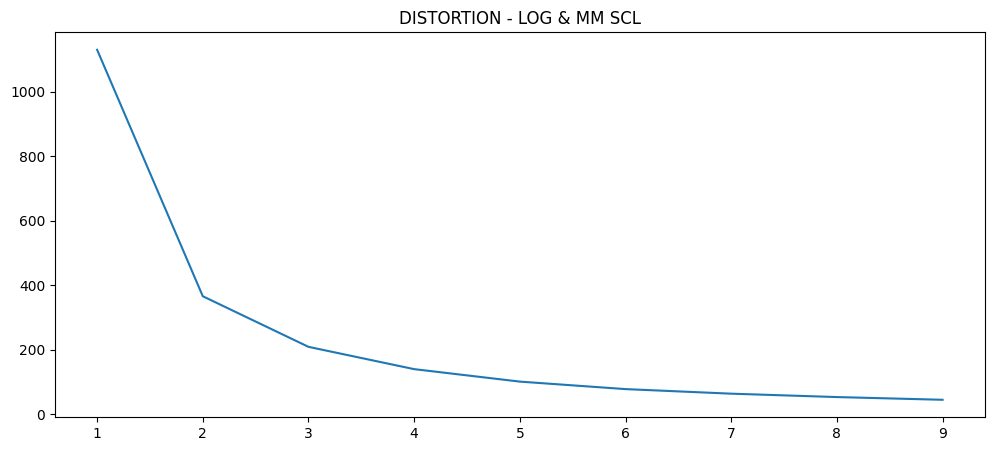

In [30]:
plt.figure(figsize=(12, 5))
plt.title('DISTORTION - LOG & MM SCL')
sns.lineplot(x=[*range(1,10)],y=log_distortion[:9])

In [31]:
# Final KMeans model

from sklearn.cluster import KMeans

log_df = log_transformation(df.copy()) # Log Transformations

# MinMax Scaler (Normalization)
log_df.loc[:] = MinMaxScaler().fit_transform(log_df)

log_kmeans = KMeans(n_clusters=3,init='k-means++',n_init=1,random_state=321)
labels = log_kmeans.fit_predict(log_df)

cluster_df = df.copy()
cluster_df['cluster'] = labels; log_df['cluster'] = labels
mean_df = pd.concat([log_df.groupby('cluster').mean().T,pd.Series(log_df.mean(),name='Dataset')],axis=1).iloc[:-1]

For n_clusters = 3; - The average silhouette_score is : 0.22889524583682322


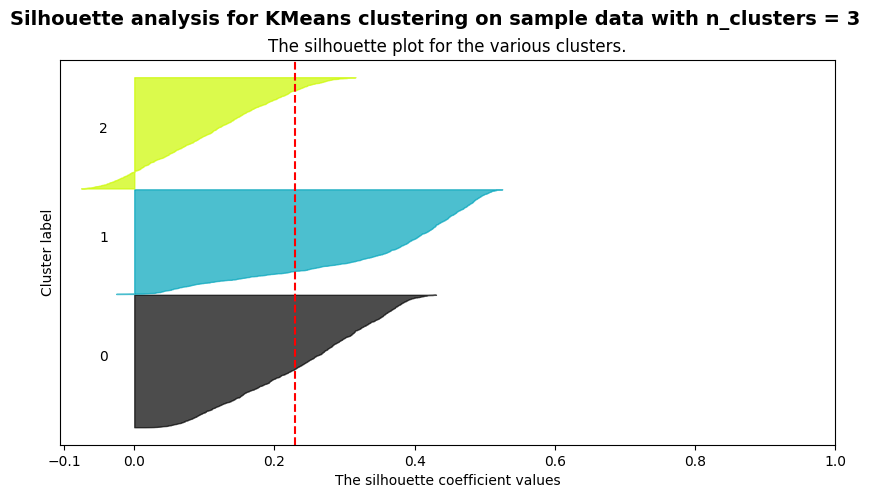

In [32]:
# CODE ADAPTED FROM A SKLEARN ALGORITHM EXAMPLE
# Originial source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1,1,1)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(log_df.iloc[:,:-1], labels)
print(
    "For n_clusters = 3; -",
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(log_df.iloc[:,:-1], labels)

y_lower = 10; n_clusters = 3
# Aggregate the silhouette scores for samples belonging to
# cluster i, and sort them
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = 3",
    fontsize=14,
    fontweight="bold",
)

plt.show()

In [33]:
print('MEAN COMPARISON BETWEEN CLUSTERS GENERATED BY KMEANS')
pd.concat([cluster_df.groupby('cluster').mean().T,pd.Series(df.mean(),name='Dataset')],axis=1)

MEAN COMPARISON BETWEEN CLUSTERS GENERATED BY KMEANS


,0,1,2,Dataset
Runtime,118.103469,106.279661,105.139130,110.411247
Release Year,2006.894705,1993.845146,2011.780435,2004.535061
Rating,6.800061,6.468490,6.221232,6.515598
Number of Ratings,0.306782,0.068938,0.091904,0.166710
Budget,80.317374,17.682163,23.830807,43.462024
Gross worldwide,291.010973,30.153861,48.279997,135.130094
US/Canada Gross Proportion,0.427832,0.960728,0.507325,0.613298
US/Canada Opening Weekend Impact,0.256789,0.223778,0.304336,0.262058


In [34]:
print('MEDIAN COMPARISON BETWEEN CLUSTERS GENERATED BY KMEANS')
pd.concat([cluster_df.groupby('cluster').median().T,pd.Series(df.median(),name='Dataset')],axis=1)

MEDIAN COMPARISON BETWEEN CLUSTERS GENERATED BY KMEANS


,0,1,2,Dataset
Runtime,116.000000,103.000000,103.000000,107.000000
Release Year,2008.000000,1993.000000,2012.000000,2006.000000
Rating,6.800000,6.600000,6.300000,6.600000
Number of Ratings,0.211000,0.039000,0.070000,0.090000
Budget,65.000000,15.000000,20.000000,27.000000
Gross worldwide,198.520934,21.286603,38.272506,59.468275
US/Canada Gross Proportion,0.428531,1.000000,0.528440,0.564203
US/Canada Opening Weekend Impact,0.278807,0.223152,0.339253,0.282285


In [35]:
std_df = pd.concat([np.sqrt(log_df.groupby('cluster').var()).T,pd.Series(np.sqrt(log_df.var()),name='Dataset')],axis=1).iloc[:-1]
print('STANDARD DEVIATION COMPARISON BETWEEN CLUSTERS GENERATED BY KMEANS')
pd.concat([np.sqrt(cluster_df.groupby('cluster').var()).T,pd.Series(np.sqrt(df.var()),name='Dataset')],axis=1)

STANDARD DEVIATION COMPARISON BETWEEN CLUSTERS GENERATED BY KMEANS


,0,1,2,Dataset
Runtime,20.099515,18.433851,14.446151,18.939464
Release Year,8.915109,9.127803,6.462054,11.035202
Rating,0.848525,0.890367,0.972668,0.934237
Number of Ratings,0.303161,0.126337,0.086599,0.232897
Budget,56.495509,14.916208,19.035425,47.276006
Gross worldwide,284.105389,30.405315,43.287478,215.678694
US/Canada Gross Proportion,0.141972,0.083468,0.213544,0.277934
US/Canada Opening Weekend Impact,0.127302,0.148147,0.171010,0.152007


In [36]:
for i in np.unique(labels):
    print('CLUSTER',i)
    print(cluster_df.loc[cluster_df.cluster==i].describe().T[['count','min','max']][:-1],'\n')

print('DATASET')
print(cluster_df.describe().T[['count','min','max']][:-1],'\n')

CLUSTER 0
                                   count          min          max
Runtime                           1643.0    76.000000   201.000000
Release Year                      1643.0  1972.000000  2023.000000
Rating                            1643.0     3.400000     9.200000
Number of Ratings                 1643.0     0.003900     2.800000
Budget                            1643.0     2.000000   356.000000
Gross worldwide                   1643.0    15.001776  2923.706026
US/Canada Gross Proportion        1643.0     0.000379     0.907269
US/Canada Opening Weekend Impact  1643.0     0.000607     0.635525 

CLUSTER 1
                                   count          min          max
Runtime                           1298.0    69.000000   271.000000
Release Year                      1298.0  1972.000000  2023.000000
Rating                            1298.0     2.600000     9.300000
Number of Ratings                 1298.0     0.000891     2.800000
Budget                            1298.0

In [37]:
top5_features = top5_by_cluster(mean_df,std_df)
print('FILTRATING THE 5 FEATURES WITH THE BIGGEST DIFFERENCES IN THEIR MEANS COMPARED TO THE DATASET')
top5_features.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 FEATURES WITH THE BIGGEST DIFFERENCES IN THEIR MEANS COMPARED TO THE DATASET


,Mean_0,Mean_1,Mean_2
1,US/Canada Gross Proportion,US/Canada Gross Proportion,Release Year
2,Gross worldwide,Release Year,US/Canada Gross Proportion
3,Budget,Gross worldwide,Gross worldwide
4,Number of Ratings,Budget,Budget
5,Release Year,Number of Ratings,US/Canada Opening Weekend Impact


In [38]:
top5_values = top5_by_cluster(mean_df,std_df,False)
top5_values.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

,Mean_0,Mean_1,Mean_2
1,0.185487,0.347469,0.142066
2,0.167055,0.209606,0.105986
3,0.148313,0.131856,0.074872
4,0.108679,0.116016,0.067456
5,0.046268,0.099505,0.042285


In [39]:
print('FILTRATING THE 5 MOST SPREAD FEATURES COMPARED TO THE DATASET')
top5_features.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 MOST SPREAD FEATURES COMPARED TO THE DATASET


,Prop_0,Prop_1,Prop_2
1,US/Canada Gross Proportion,US/Canada Gross Proportion,Release Year
2,Gross worldwide,Gross worldwide,Number of Ratings
3,Budget,Budget,US/Canada Gross Proportion
4,Number of Ratings,Release Year,Gross worldwide
5,Release Year,Number of Ratings,Runtime


In [40]:
top5_values.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

,Prop_0,Prop_1,Prop_2
1,0.489189,0.699683,0.414415
2,0.464651,0.256694,0.291874
3,0.321628,0.191687,0.231671
4,0.261215,0.172847,0.218186
5,0.192121,0.133712,0.183031


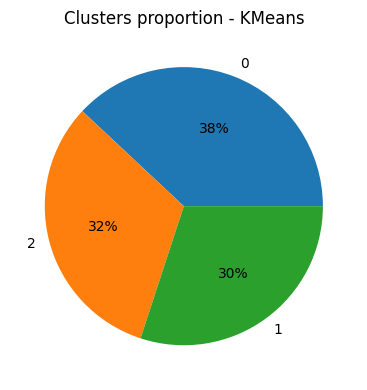

In [41]:
clusters_porportion(cluster_df,'KMeans')

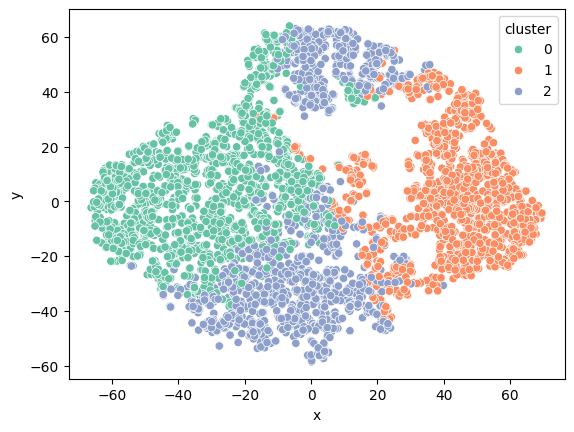

In [42]:
#sns.pairplot(cluster_df,hue='cluster',palette='Set2')
# the T-Distributed Stochastic Neighbor Embedding (TSNE) - tool for visualizing high-dimensional data
clusters_visualization(log_df)

In [43]:
# Analyzing the genres distribution in each cluster compared to all dataset

clusters_genres = pd.concat([ohe_genres,pd.Series(labels,name='Cluster')],axis=1).groupby('Cluster').mean().T
df_genres = pd.Series(ohe_genres.mean(),name='Dataset')
pd.concat([round(clusters_genres,4)*100,round(df_genres,4)*100],axis=1)

,0,1,2,Dataset
Action,45.16,19.18,25.07,30.94
Adventure,41.02,15.02,13.12,24.30
Animation,10.41,2.23,2.83,5.53
Biography,6.15,6.78,8.62,7.13
Comedy,33.96,46.46,35.22,38.12
Crime,16.56,20.65,20.36,19.00
Documentary,0.00,0.23,0.36,0.19
Drama,39.62,52.39,51.81,47.35
Family,7.55,8.17,4.35,6.71
Fantasy,11.56,10.17,7.46,9.84


In [44]:
# Analyzing the 3 moveis closest to their respective centroids for each cluster

centroids = pd.DataFrame(log_kmeans.cluster_centers_,columns=df.columns).T

clust_centr = [[],[],[]]
for i in range(3):
    for j in log_df.loc[log_df.cluster==i].index:
        diff = sum(np.abs(log_df.iloc[j,:-1]-centroids[i]))
        if len(clust_centr[i]) < 3 : clust_centr[i].append((diff,j))
        else:
            if diff < np.array(clust_centr[i])[:,0].max():
                ind = np.array(clust_centr[i])[:,0].argmax()
                clust_centr[i][ind] = (diff,j)
clust_centr

[[(0.2743758429549767, 2030),
  (0.23111966406399073, 260),
  (0.16550009237420416, 1052)],
 [(0.2533880024306816, 1703),
  (0.20519311084500988, 1287),
  (0.25659338746659266, 685)],
 [(0.2650423984711903, 1663),
  (0.2550495994824541, 3270),
  (0.24846126628113513, 3185)]]

In [45]:
# Getting the name of the 3 closest movies to the centroids for each cluster

for i in range(3):
    print('CLUSTER',i,'\n')
    print(id_movies.iloc[cluster_df.iloc[np.array(clust_centr[i])[:,1]].index],'\n\n')


#orig_df.iloc[np.array(orig_ind)[cluster_df.iloc[np.array(clust_centr[i])[:,1]].index]]

CLUSTER 0 

2030     Yes Man
260          RED
1052    Valkyrie
Name: Title, dtype: object 


CLUSTER 1 

1703           Fire in the Sky
1287             Little Giants
685     It Could Happen to You
Name: Title, dtype: object 


CLUSTER 2 

1663       No Escape - 2015
3270      The Nanny Diaries
3185    What's Your Number?
Name: Title, dtype: object 




In [46]:
# Analyzing the genres distribution in each cluster compared to all dataset

genres_mean = pd.concat([ohe_genres,pd.Series(labels,name='Cluster')],axis=1).groupby('Cluster').mean().T
df_genres = pd.Series(ohe_genres.mean(),name='Dataset')

genres_count = pd.concat([ohe_genres,pd.Series(labels,name='Cluster')],axis=1).groupby('Cluster').sum().T
df_count = pd.Series(ohe_genres.sum(),name='Dataset')

genres_mean = pd.concat([round(genres_mean,4)*100,round(df_genres,4)*100],axis=1)
genres_count = pd.concat([genres_count,df_count],axis=1)

top5_features = top5_by_cluster(genres_mean,genres_count)
top5_values = top5_by_cluster(genres_mean,genres_count,False)

In [47]:
print('FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR DISTRIBUTIONS COMPARED TO THE DATASET')
top5_features.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR DISTRIBUTIONS COMPARED TO THE DATASET


,Mean_0,Mean_1,Mean_2
1,Adventure,Action,Adventure
2,Action,Adventure,Horror
3,Drama,Comedy,Mystery
4,Horror,Drama,Action
5,Animation,Thriller,Thriller


In [48]:
top5_values.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

,Mean_0,Mean_1,Mean_2
1,16.72,11.76,11.18
2,14.22,9.28,7.72
3,7.73,8.34,6.50
4,7.23,5.04,5.87
5,4.88,4.45,4.52


In [49]:
print('FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR PROPORTIONS COMPARED TO THE DATASET')
top5_features.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR PROPORTIONS COMPARED TO THE DATASET


,Prop_0,Prop_1,Prop_2
1,Documentary,Animation,Animation
2,Horror,Adventure,Musical
3,Sport,Action,Adventure
4,Music,Mystery,Sport
5,Western,Thriller,Family


In [50]:
top5_values.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

,Prop_0,Prop_1,Prop_2
1,1.000000,0.878661,0.836820
2,0.836066,0.814286,0.833333
3,0.801887,0.813762,0.827619
4,0.748031,0.806941,0.801887
5,0.708333,0.779310,0.793103


In [51]:
# Code used to analyze different values for 'n_samples' and 'epslons' parameters

#from sklearn.cluster import DBSCAN

#log_df = log_transformation(df.copy()) # Log Transformations

# MinMax Scaler (Normalization)
#log_df.loc[:] = MinMaxScaler().fit_transform(log_df)

#n_samples = [8,10,15,20,25,30,35,40]#[8,10,12,15,17,20]
#epslons = [0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]
#max_out = 1; max_n = 0; max_eps = 0

#for i,e in enumerate(epslons):
#    for n in n_samples:
#        dbscan = DBSCAN(eps=e,min_samples=n)
#        dbscan.fit(log_df)
#        log_labels = pd.Series(dbscan.labels_)
#        if (len(np.unique(log_labels)) == 4) and (log_labels.value_counts(normalize=True)[-1] < max_out) and (log_labels.value_counts(normalize=True).max() <= 0.9): 
#            max_n = n; max_eps = e; max_out = log_labels.value_counts(normalize=True)[-1]
#        print(f'eps = {e}; min_samples = {n}') 
#        print(f'Nº of Clusters = {len(np.unique(log_labels))-1}\n')

#print('BEST PARAMETERS',max_out,max_eps,max_n) 
#
# BEST PARAMETERS 0.19972228650775284 0.19 10

In [52]:
# Analyzing the best model obtained in the code above for 3 clusters

from sklearn.cluster import DBSCAN

log_df = log_transformation(df.copy()) # Log Transformations

# MinMax Scaler (Normalization)
log_df.loc[:] = MinMaxScaler().fit_transform(log_df)

dbscan_log = DBSCAN(eps=0.19,min_samples=10)
dbscan_log.fit(log_df)
log_labels = pd.Series(dbscan_log.labels_)
print(f'Nº of Clusters = {len(np.unique(log_labels))-1}\n')
print(log_labels.value_counts(normalize=True))

Nº of Clusters = 3

 0    0.796343
-1    0.199722
 2    0.002314
 1    0.001620
Name: proportion, dtype: float64


In [53]:
# Investigating different values for 'bandwidth' parameter

from sklearn.cluster import MeanShift

log_df = log_transformation(df.copy()) # Log Transformations

# MinMax Scaler (Normalization)
log_df.loc[:] = MinMaxScaler().fit_transform(log_df)

band_list = [0.4,0.41,0.42,0.43,0.44,0.45] #[0.2,0.3,0.4,0.5,0.6,0.7]

for i in band_list:
    ms = MeanShift(bandwidth=i,cluster_all=True)
    labels = ms.fit_predict(log_df)
    print(f'bandwidth = {i}')
    n = len(np.unique(labels))
    print(f'Nº of Clusters = {n}\n')
    print(pd.Series(labels).value_counts())#(normalize=True))

bandwidth = 0.4
Nº of Clusters = 6

0    2836
1    1337
2      95
5      32
3      13
4       8
Name: count, dtype: int64
bandwidth = 0.41
Nº of Clusters = 5

0    2893
1    1363
4      44
2      13
3       8
Name: count, dtype: int64
bandwidth = 0.42
Nº of Clusters = 5

0    2872
1    1390
4      38
2      13
3       8
Name: count, dtype: int64
bandwidth = 0.43
Nº of Clusters = 4

0    2604
1    1692
2      17
3       8
Name: count, dtype: int64
bandwidth = 0.44
Nº of Clusters = 2

0    2678
1    1643
Name: count, dtype: int64
bandwidth = 0.45
Nº of Clusters = 1

0    4321
Name: count, dtype: int64


In [54]:
# Analyzing how many registers would be considered outliers if the parameter 'cluster_all' is false

#log_df = log_transformation(df.copy()) # Log Transformations

# MinMax Scaler (Normalization)
#log_df.loc[:] = MinMaxScaler().fit_transform(log_df)

#ms = MeanShift(bandwidth=0.44,cluster_all=False)
#labels = ms.fit_predict(log_df)
#n = len(np.unique(labels))
#print(f'Nº of Clusters = {n}\n')
#print('Proportion of Outliers = ',str(round(pd.Series(labels).value_counts(normalize=True)[-1],4)*100)+'%','\n')
#
#Nº of Clusters = 3
#
#Proportion of Outliers =  33.56% 

In [55]:
# Final MeanShift model

log_df = log_transformation(df.copy()) # Log Transformations

# MinMax Scaler (Normalization)
log_df.loc[:] = MinMaxScaler().fit_transform(log_df)

ms = MeanShift(bandwidth=0.44,cluster_all=True)
labels = ms.fit_predict(log_df)
n = len(np.unique(labels))
print(f'Nº of Clusters = {n}\n')
print(pd.Series(labels).value_counts(normalize=True))

Nº of Clusters = 2

0    0.619764
1    0.380236
Name: proportion, dtype: float64


In [56]:
cluster_df = df.copy()
cluster_df['cluster'] = labels; log_df['cluster'] = labels
mean_df = pd.concat([log_df.groupby('cluster').mean().T,pd.Series(log_df.mean(),name='Dataset')],axis=1).iloc[:-1]
print('MEAN COMPARISON BETWEEN CLUSTERS GENERATED BY MEANSHIFT')
pd.concat([cluster_df.groupby('cluster').mean().T,pd.Series(df.mean(),name='Dataset')],axis=1)

MEAN COMPARISON BETWEEN CLUSTERS GENERATED BY MEANSHIFT


,0,1,Dataset
Runtime,113.018297,106.161899,110.411247
Release Year,2009.399178,1996.606817,2004.535061
Rating,6.561426,6.440901,6.515598
Number of Ratings,0.221100,0.078056,0.166710
Budget,58.837809,18.400337,43.462024
Gross worldwide,195.988962,35.933473,135.130094
US/Canada Gross Proportion,0.431345,0.909871,0.613298
US/Canada Opening Weekend Impact,0.281316,0.230668,0.262058


In [57]:
print('MEDIAN COMPARISON BETWEEN CLUSTERS GENERATED BY KMEANS')
pd.concat([cluster_df.groupby('cluster').median().T,pd.Series(df.median(),name='Dataset')],axis=1)

MEDIAN COMPARISON BETWEEN CLUSTERS GENERATED BY KMEANS


,0,1,Dataset
Runtime,110.000000,103.000000,107.000000
Release Year,2010.000000,1995.000000,2006.000000
Rating,6.600000,6.500000,6.600000
Number of Ratings,0.134000,0.044000,0.090000
Budget,40.000000,15.000000,27.000000
Gross worldwide,115.219585,23.144499,59.468275
US/Canada Gross Proportion,0.442203,0.999940,0.564203
US/Canada Opening Weekend Impact,0.300218,0.234220,0.282285


In [58]:
std_df = pd.concat([np.sqrt(log_df.groupby('cluster').var()).T,pd.Series(np.sqrt(log_df.var()),name='Dataset')],axis=1).iloc[:-1]
print('STANDARD DEVIATION COMPARISON BETWEEN CLUSTERS GENERATED BY MEANSHIFT')
pd.concat([np.sqrt(cluster_df.groupby('cluster').var()).T,pd.Series(np.sqrt(df.var()),name='Dataset')],axis=1)

STANDARD DEVIATION COMPARISON BETWEEN CLUSTERS GENERATED BY MEANSHIFT


,0,1,Dataset
Runtime,19.132436,17.826695,18.939464
Release Year,8.032207,10.663894,11.035202
Rating,0.927504,0.940615,0.934237
Number of Ratings,0.258957,0.143832,0.232897
Budget,53.226005,15.729533,47.276006
Gross worldwide,252.581279,49.868895,215.678694
US/Canada Gross Proportion,0.162479,0.134864,0.277934
US/Canada Opening Weekend Impact,0.147841,0.153512,0.152007


In [59]:
for i in np.unique(labels):
    print('CLUSTER',i)
    print(cluster_df.loc[cluster_df.cluster==i].describe().T[['count','min','max']][:-1],'\n')

print('DATASET')
print(cluster_df.describe().T[['count','min','max']][:-1],'\n')

CLUSTER 0
                                   count          min          max
Runtime                           2678.0    63.000000   201.000000
Release Year                      2678.0  1978.000000  2023.000000
Rating                            2678.0     1.900000     9.000000
Number of Ratings                 2678.0     0.003900     2.800000
Budget                            2678.0     0.100000   356.000000
Gross worldwide                   2678.0     0.008315  2923.706026
US/Canada Gross Proportion        2678.0     0.000115     0.828421
US/Canada Opening Weekend Impact  2678.0     0.000607     1.000000 

CLUSTER 1
                                   count          min          max
Runtime                           1643.0    69.000000   271.000000
Release Year                      1643.0  1972.000000  2023.000000
Rating                            1643.0     2.100000     9.300000
Number of Ratings                 1643.0     0.000891     2.800000
Budget                            1643.0

In [60]:
top5_features = top5_by_cluster(mean_df,std_df)
print('FILTRATING THE 5 FEATURES WITH THE BIGGEST DIFFERENCES IN THEIR MEANS COMPARED TO THE DATASET')
top5_features.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 FEATURES WITH THE BIGGEST DIFFERENCES IN THEIR MEANS COMPARED TO THE DATASET


,Mean_0,Mean_1
1,US/Canada Gross Proportion,US/Canada Gross Proportion
2,Release Year,Release Year
3,Gross worldwide,Gross worldwide
4,Budget,Budget
5,Number of Ratings,Number of Ratings


In [61]:
top5_values = top5_by_cluster(mean_df,std_df,False)
top5_values.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

,Mean_0,Mean_1
1,0.181974,0.296607
2,0.095375,0.155456
3,0.074810,0.121937
4,0.068811,0.112158
5,0.053354,0.086964


In [62]:
print('FILTRATING THE 5 MOST SPREAD FEATURES COMPARED TO THE DATASET')
top5_features.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 MOST SPREAD FEATURES COMPARED TO THE DATASET


,Prop_0,Prop_1
1,US/Canada Gross Proportion,US/Canada Gross Proportion
2,Release Year,Gross worldwide
3,Number of Ratings,Budget
4,Gross worldwide,Number of Ratings
5,Budget,Runtime


In [63]:
top5_values.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

,Prop_0,Prop_1
1,0.415402,0.514762
2,0.272129,0.214863
3,0.133153,0.169261
4,0.109554,0.119840
5,0.094531,0.053432


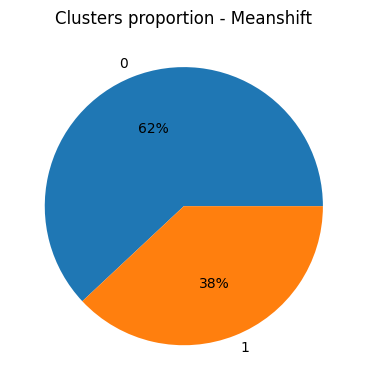

In [64]:
clusters_porportion(cluster_df,'Meanshift')

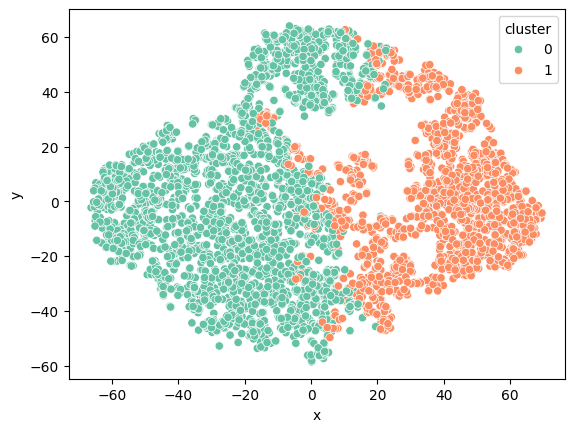

In [65]:
#sns.pairplot(cluster_df,hue='cluster',palette='Set2')
#the T-Distributed Stochastic Neighbor Embedding (TSNE) - tool for visualizing high-dimensional data
clusters_visualization(log_df)

In [66]:
# Analyzing the genres distribution in each cluster compared to all dataset

clusters_genres = pd.concat([ohe_genres,pd.Series(labels,name='Cluster')],axis=1).groupby('Cluster').mean().T
df_genres = pd.Series(ohe_genres.mean(),name='Dataset')
pd.concat([round(clusters_genres,4)*100,round(df_genres,4)*100],axis=1)

,0,1,Dataset
Action,38.09,19.29,30.94
Adventure,30.32,14.49,24.30
Animation,7.73,1.95,5.53
Biography,6.98,7.36,7.13
Comedy,33.27,46.01,38.12
Crime,18.30,20.15,19.00
Documentary,0.07,0.37,0.19
Drama,44.32,52.28,47.35
Family,5.90,8.03,6.71
Fantasy,10.08,9.43,9.84


In [67]:
# Analyzing the 3 moveis closest to their respective centroids for each cluster

centroids = pd.DataFrame(ms.cluster_centers_,columns=df.columns).T

clust_centr = [[],[]]
for i in range(3):
    for j in log_df.loc[log_df.cluster==i].index:
        diff = sum(np.abs(log_df.iloc[j,:-1]-centroids[i]))
        if len(clust_centr[i]) < 3 : clust_centr[i].append((diff,j))
        else:
            if diff < np.array(clust_centr[i])[:,0].max():
                ind = np.array(clust_centr[i])[:,0].argmax()
                clust_centr[i][ind] = (diff,j)
clust_centr

[[(0.20762920585542388, 2730),
  (0.20732205654257324, 2671),
  (0.17431127979707645, 3151)],
 [(0.24471866772261558, 3837),
  (0.3047750874121374, 4157),
  (0.3098339078244093, 948)]]

In [68]:
# Getting the name of the 3 closest movies to the centroids for each cluster

for i in range(2):
    print('CLUSTER',i,'\n')
    print(id_movies.iloc[cluster_df.iloc[np.array(clust_centr[i])[:,1]].index],'\n\n')


#orig_df.iloc[np.array(orig_ind)[cluster_df.iloc[np.array(clust_centr[i])[:,1]].index]]

CLUSTER 0 

2730      The Skeleton Key
2671     The Bounty Hunter
3151    Life as We Know It
Name: Title, dtype: object 


CLUSTER 1 

3837        Money Talks
4157    Nothing to Lose
948       Varsity Blues
Name: Title, dtype: object 




In [69]:
# Analyzing the genres distribution in each cluster compared to all dataset

genres_mean = pd.concat([ohe_genres,pd.Series(labels,name='Cluster')],axis=1).groupby('Cluster').mean().T
df_genres = pd.Series(ohe_genres.mean(),name='Dataset')

genres_count = pd.concat([ohe_genres,pd.Series(labels,name='Cluster')],axis=1).groupby('Cluster').sum().T
df_count = pd.Series(ohe_genres.sum(),name='Dataset')

genres_mean = pd.concat([round(genres_mean,4)*100,round(df_genres,4)*100],axis=1)
genres_count = pd.concat([genres_count,df_count],axis=1)

top5_features = top5_by_cluster(genres_mean,genres_count)
top5_values = top5_by_cluster(genres_mean,genres_count,False)

In [70]:
print('FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR DISTRIBUTIONS COMPARED TO THE DATASET')
top5_features.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR DISTRIBUTIONS COMPARED TO THE DATASET


,Mean_0,Mean_1
1,Action,Action
2,Adventure,Adventure
3,Comedy,Comedy
4,Drama,Drama
5,Thriller,Thriller


In [71]:
top5_values.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

,Mean_0,Mean_1
1,7.15,11.65
2,6.02,9.81
3,4.85,7.89
4,3.03,4.93
5,2.71,4.42


In [72]:
print('FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR PROPORTIONS COMPARED TO THE DATASET')
top5_features.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR PROPORTIONS COMPARED TO THE DATASET


,Prop_0,Prop_1
1,Documentary,Animation
2,Sport,Adventure
3,Western,Action
4,Music,Sci-Fi
5,Musical,Thriller


In [73]:
top5_values.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

,Prop_0,Prop_1
1,0.750000,0.866109
2,0.707547,0.773333
3,0.625000,0.762902
4,0.559055,0.724638
5,0.472222,0.720000


In [74]:
# Comparing different linkages to AgglomerativeClustering algorithm and searching the ones with the most balanced clusters

from sklearn.cluster import AgglomerativeClustering

log_df = log_transformation(df.copy()) # Log Transformations

# MinMax Scaler (Normalization)
log_df.loc[:] = MinMaxScaler().fit_transform(log_df)

link_list = ['ward','complete','average','single']
for l in link_list:
    agg = AgglomerativeClustering(n_clusters=3,linkage=l,compute_full_tree=True)
    labels = agg.fit_predict(log_df)
    print(f'Linkage = {l}')
    n = len(np.unique(labels))
    print(f'Nº of Clusters = {n}')
    print(pd.Series(labels).value_counts(),'\n')#(normalize=True))

Linkage = ward
Nº of Clusters = 3
0    2154
1    1311
2     856
Name: count, dtype: int64 

Linkage = complete
Nº of Clusters = 3
1    1956
0    1336
2    1029
Name: count, dtype: int64 

Linkage = average
Nº of Clusters = 3
2    4275
0      45
1       1
Name: count, dtype: int64 

Linkage = single
Nº of Clusters = 3
0    4319
2       1
1       1
Name: count, dtype: int64 



In [75]:
# Comparing 'ward' and 'complete' models to see which one have the closest distances between clusters

log_df = log_transformation(df.copy()) # Log Transformations

# MinMax Scaler (Normalization)
log_df.loc[:] = MinMaxScaler().fit_transform(log_df)

for l in ['ward','complete']:
    agg = AgglomerativeClustering(n_clusters=3,linkage=l,compute_full_tree=True,compute_distances=True)
    labels = agg.fit_predict(log_df)
    print(f'Linkage = {l}')
    n = len(np.unique(labels))
    print(f'Distances:\n- Sum = {agg.distances_.sum()};\n- Min = {agg.distances_.min()};\n- Max = {agg.distances_.max()}.','\n')
#    visualize_tree(list(pd.Series(labels).value_counts().index),agg.children_,l)

Linkage = ward
Distances:
- Sum = 1297.8797524130232;
- Min = 0.03460369338423798;
- Max = 27.403181642092445. 

Linkage = complete
Distances:
- Sum = 954.6404772151868;
- Min = 0.03460369338423798;
- Max = 1.9230212748839604. 



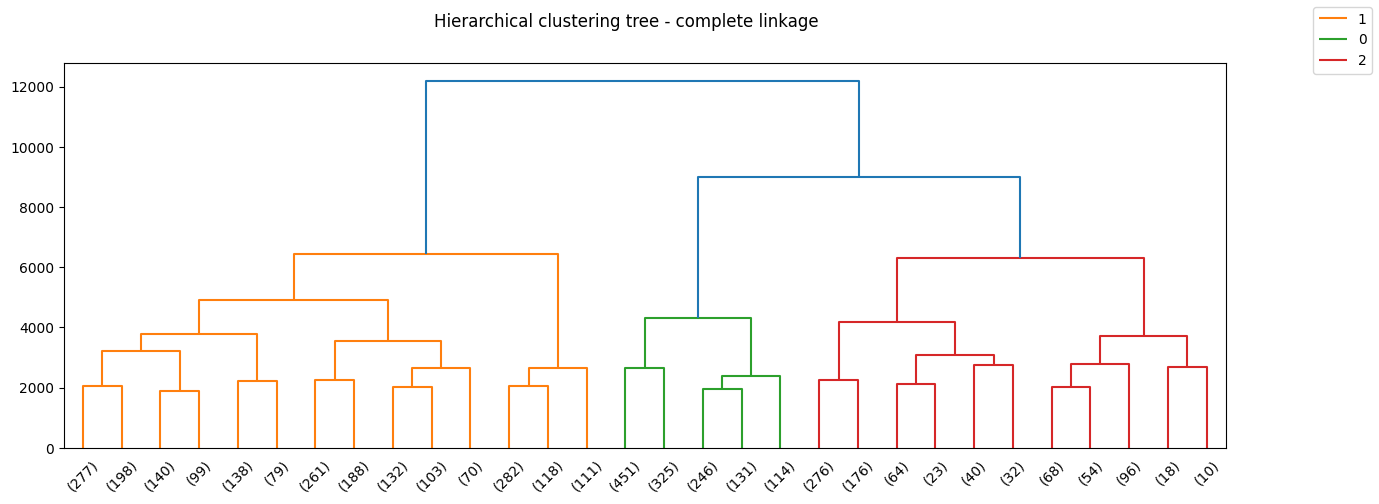

In [76]:
# Final Hierarchical Clustering model

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

def visualize_tree(lab,child,m):
    Z = hierarchy.linkage(y=child, method=m)
    fig, ax = plt.subplots(figsize=(15,5))
    hierarchy.dendrogram(Z, orientation='top', p=30, truncate_mode='lastp', show_leaf_counts=True, ax=ax, count_sort='descending')
    fig.suptitle(f'Hierarchical clustering tree - {m} linkage')
    fig.legend(lab)

log_df = log_transformation(df.copy()) # Log Transformations

# MinMax Scaler (Normalization)
log_df.loc[:] = MinMaxScaler().fit_transform(log_df)

agg = AgglomerativeClustering(n_clusters=3,linkage='complete',compute_full_tree=True,compute_distances=True)
labels = agg.fit_predict(log_df)

visualize_tree(list(pd.Series(labels).value_counts().index),agg.children_,'complete')

In [77]:
cluster_df = df.copy()
cluster_df['cluster'] = labels; log_df['cluster'] = labels
mean_df = pd.concat([log_df.groupby('cluster').mean().T,pd.Series(log_df.mean(),name='Dataset')],axis=1).iloc[:-1]
print('MEAN COMPARISON BETWEEN CLUSTERS GENERATED BY KMEANS')
pd.concat([cluster_df.groupby('cluster').mean().T,pd.Series(df.mean(),name='Dataset')],axis=1)

MEAN COMPARISON BETWEEN CLUSTERS GENERATED BY KMEANS


,0,1,2,Dataset
Runtime,120.595060,104.632413,108.173955,110.411247
Release Year,2007.123503,2010.088957,1990.617104,2004.535061
Rating,6.980240,6.150460,6.606414,6.515598
Number of Ratings,0.343343,0.093843,0.075887,0.166710
Budget,83.673952,29.350384,18.077411,43.462024
Gross worldwide,316.627865,64.422747,33.888644,135.130094
US/Canada Gross Proportion,0.414392,0.566097,0.961271,0.613298
US/Canada Opening Weekend Impact,0.240541,0.307255,0.204081,0.262058


In [78]:
print('MEDIAN COMPARISON BETWEEN CLUSTERS GENERATED BY HIERARCHICAL')
pd.concat([cluster_df.groupby('cluster').median().T,pd.Series(df.median(),name='Dataset')],axis=1)

MEDIAN COMPARISON BETWEEN CLUSTERS GENERATED BY HIERARCHICAL


,0,1,2,Dataset
Runtime,119.000000,102.000000,106.000000,107.000000
Release Year,2008.000000,2010.000000,1991.000000,2006.000000
Rating,7.000000,6.200000,6.700000,6.600000
Number of Ratings,0.247000,0.070500,0.042000,0.090000
Budget,70.000000,22.000000,15.000000,27.000000
Gross worldwide,216.943963,43.485233,24.147179,59.468275
US/Canada Gross Proportion,0.409346,0.554567,1.000000,0.564203
US/Canada Opening Weekend Impact,0.263621,0.332406,0.208124,0.282285


In [79]:
std_df = pd.concat([np.sqrt(log_df.groupby('cluster').var()).T,pd.Series(np.sqrt(log_df.var()),name='Dataset')],axis=1).iloc[:-1]
print('STANDARD DEVIATION COMPARISON BETWEEN CLUSTERS GENERATED BY HIERARCHICAL')
pd.concat([np.sqrt(cluster_df.groupby('cluster').var()).T,pd.Series(np.sqrt(df.var()),name='Dataset')],axis=1)

STANDARD DEVIATION COMPARISON BETWEEN CLUSTERS GENERATED BY HIERARCHICAL


,0,1,2,Dataset
Runtime,20.262212,14.569082,19.163231,18.939464
Release Year,9.407807,7.133026,6.224648,11.035202
Rating,0.782619,0.934841,0.817237,0.934237
Number of Ratings,0.321048,0.090942,0.139464,0.232897
Budget,60.901546,25.382093,15.002458,47.276006
Gross worldwide,308.245566,66.400563,33.500168,215.678694
US/Canada Gross Proportion,0.138277,0.244043,0.098311,0.277934
US/Canada Opening Weekend Impact,0.136172,0.158061,0.132869,0.152007


In [80]:
for i in np.unique(labels):
    print('CLUSTER',i)
    print(cluster_df.loc[cluster_df.cluster==i].describe().T[['count','min','max']][:-1],'\n')

print('DATASET')
print(cluster_df.describe().T[['count','min','max']][:-1],'\n')

CLUSTER 0
                                   count          min          max
Runtime                           1336.0    77.000000   201.000000
Release Year                      1336.0  1972.000000  2023.000000
Rating                            1336.0     4.200000     9.200000
Number of Ratings                 1336.0     0.003900     2.800000
Budget                            1336.0     3.000000   356.000000
Gross worldwide                   1336.0    13.627519  2923.706026
US/Canada Gross Proportion        1336.0     0.000379     0.827803
US/Canada Opening Weekend Impact  1336.0     0.000607     0.528066 

CLUSTER 1
                                   count          min          max
Runtime                           1956.0    63.000000   179.000000
Release Year                      1956.0  1983.000000  2023.000000
Rating                            1956.0     1.900000     8.500000
Number of Ratings                 1956.0     0.001100     1.300000
Budget                            1956.0

In [81]:
top5_features = top5_by_cluster(mean_df,std_df)
print('FILTRATING THE 5 FEATURES WITH THE BIGGEST DIFFERENCES IN THEIR MEANS COMPARED TO THE DATASET')
top5_features.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 FEATURES WITH THE BIGGEST DIFFERENCES IN THEIR MEANS COMPARED TO THE DATASET


,Mean_0,Mean_1,Mean_2
1,US/Canada Gross Proportion,Release Year,US/Canada Gross Proportion
2,Gross worldwide,Gross worldwide,Release Year
3,Budget,Rating,Gross worldwide
4,Number of Ratings,US/Canada Gross Proportion,Budget
5,Rating,US/Canada Opening Weekend Impact,Number of Ratings


In [82]:
top5_values = top5_by_cluster(mean_df,std_df,False)
top5_values.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

,Mean_0,Mean_1,Mean_2
1,0.198929,0.108900,0.348012
2,0.171295,0.056213,0.272901
3,0.148123,0.049343,0.115548
4,0.124432,0.047206,0.107916
5,0.062789,0.045205,0.090535


In [83]:
print('FILTRATING THE 5 MOST SPREAD FEATURES COMPARED TO THE DATASET')
top5_features.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 MOST SPREAD FEATURES COMPARED TO THE DATASET


,Prop_0,Prop_1,Prop_2
1,US/Canada Gross Proportion,Release Year,US/Canada Gross Proportion
2,Gross worldwide,Number of Ratings,Release Year
3,Number of Ratings,Runtime,Gross worldwide
4,Budget,US/Canada Gross Proportion,Budget
5,Rating,Gross worldwide,US/Canada Opening Weekend Impact


In [84]:
top5_values.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

,Prop_0,Prop_1,Prop_2
1,0.502481,0.353612,0.646280
2,0.395127,0.236921,0.435928
3,0.261232,0.173075,0.282372
4,0.251382,0.121936,0.240378
5,0.162290,0.116952,0.125900


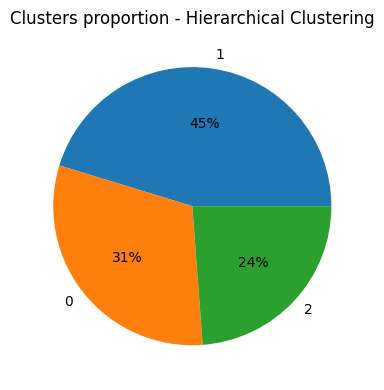

In [85]:
clusters_porportion(cluster_df,'Hierarchical Clustering')

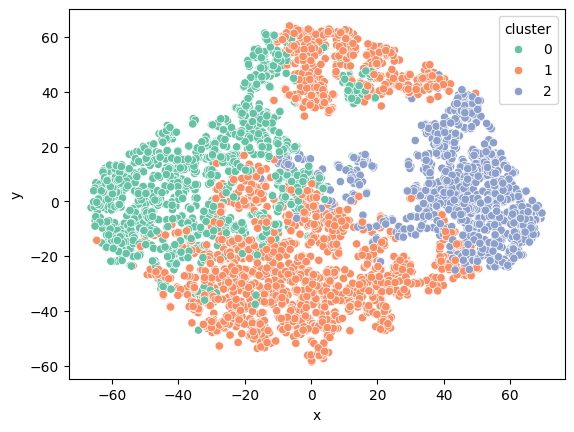

In [86]:
#sns.pairplot(cluster_df,hue='cluster',palette='Set2')
#the T-Distributed Stochastic Neighbor Embedding (TSNE) - tool for visualizing high-dimensional data
clusters_visualization(log_df)

In [87]:
# Analyzing the genres distribution in each cluster compared to all dataset

clusters_genres = pd.concat([ohe_genres,pd.Series(labels,name='Cluster')],axis=1).groupby('Cluster').mean().T
df_genres = pd.Series(ohe_genres.mean(),name='Dataset')
pd.concat([round(clusters_genres,4)*100,round(df_genres,4)*100],axis=1)

,0,1,2,Dataset
Action,46.48,25.92,20.31,30.94
Adventure,42.14,16.51,15.94,24.30
Animation,10.85,3.58,2.33,5.53
Biography,7.63,7.00,6.71,7.13
Comedy,29.34,41.56,42.95,38.12
Crime,16.47,19.48,21.38,19.00
Documentary,0.00,0.31,0.19,0.19
Drama,43.79,47.09,52.48,47.35
Family,5.91,6.70,7.77,6.71
Fantasy,11.60,8.13,10.79,9.84


In [88]:
# Analyzing the genres distribution in each cluster compared to all dataset

genres_mean = pd.concat([ohe_genres,pd.Series(labels,name='Cluster')],axis=1).groupby('Cluster').mean().T
df_genres = pd.Series(ohe_genres.mean(),name='Dataset')

genres_count = pd.concat([ohe_genres,pd.Series(labels,name='Cluster')],axis=1).groupby('Cluster').sum().T
df_count = pd.Series(ohe_genres.sum(),name='Dataset')

genres_mean = pd.concat([round(genres_mean,4)*100,round(df_genres,4)*100],axis=1)
genres_count = pd.concat([genres_count,df_count],axis=1)

top5_features = top5_by_cluster(genres_mean,genres_count)
top5_values = top5_by_cluster(genres_mean,genres_count,False)

In [89]:
print('FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR DISTRIBUTIONS COMPARED TO THE DATASET')
top5_features.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR DISTRIBUTIONS COMPARED TO THE DATASET


,Mean_0,Mean_1,Mean_2
1,Adventure,Adventure,Action
2,Action,Horror,Adventure
3,Comedy,Action,Drama
4,Horror,Mystery,Comedy
5,Animation,Comedy,Thriller


In [90]:
top5_values.loc[:,['Mean_'+str(i) for i in range(len(np.unique(labels)))]]

,Mean_0,Mean_1,Mean_2
1,17.84,7.79,10.63
2,15.54,5.03,8.36
3,8.78,5.02,5.13
4,8.37,3.59,4.83
5,5.32,3.44,4.05


In [91]:
print('FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR PROPORTIONS COMPARED TO THE DATASET')
top5_features.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

FILTRATING THE 5 GENRES WITH THE BIGGEST DIFFERENCES IN THEIR PROPORTIONS COMPARED TO THE DATASET


,Prop_0,Prop_1,Prop_2
1,Documentary,War,Animation
2,Horror,Musical,Adventure
3,Sport,Animation,Action
4,Music,Adventure,Mystery
5,Romance,Western,Thriller


In [92]:
top5_values.loc[:,['Prop_'+str(i) for i in range(len(np.unique(labels)))]]

,Prop_0,Prop_1,Prop_2
1,1.000000,0.730769,0.899582
2,0.894353,0.722222,0.843810
3,0.886792,0.707113,0.843680
4,0.834646,0.692381,0.830803
5,0.777943,0.666667,0.819310
